# TIA125 - Assignment

## Description

This part contains explonations regarding the columns in the data set
```
cohort
degree-seeking cohort type 
    ('4y bach' = Bachelor's/equivalent-seeking cohort at 4-year institutions; 
    '4y other' = Students seeking another type of degree or certificate at a 4-year institution; 
    '2y all' = Degree-seeking students at 2-year institutions)

race/ethnicity of students 
    ('X' = all students; 
    'Ai' = American Indian; 
    'A' = Asian; 
    'B' = Black; 
    'H' = Hispanic; 
    'W' = White)

grad_100: finnishing in timeframe of the programme
grad_100_rate: same as above in procent

grad_150: 1.5x time study speed
grad_150_rate: same as above in procent

grad_cohort: 
    Number of first-time, 
    full-time, 
    degree-seeking students in the cohort being tracked, 
    minus any exclusions
```

## Data processing

### Libraries

In [363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from utility folder
import sys
sys.path.append("../src/utility/")
from utility import plot_settings
from utility import visualization
from utility import data_base as data

import scipy.stats as stats
from scipy.stats import norm

import pylab
import seaborn as sns

### Data cleaning

In [364]:
df_raw = data.read_csv('../data/cc_institution_grads.csv')
print(f'Raw data file: {len(df_raw)}')
df_drop_na = df_raw.dropna()
print(f"rows after droppped Nan: {len(df_drop_na)}")
df = df_drop_na.copy()

Raw data file: 1302102
rows after droppped Nan: 332061


In [365]:
df_raw.head()

,unitid,year,gender,race,cohort,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate
0,100760,2011,B,X,2y all,446.0,73.0,105.0,16.4,23.5
1,100760,2011,M,X,2y all,185.0,NaN,40.0,NaN,21.6
2,100760,2011,F,X,2y all,261.0,NaN,65.0,NaN,24.9
3,100760,2011,B,W,2y all,348.0,NaN,86.0,NaN,24.7
4,100760,2011,M,W,2y all,162.0,NaN,35.0,NaN,21.6


In [366]:
df.head()

,unitid,year,gender,race,cohort,grad_cohort,grad_100,grad_150,grad_100_rate,grad_150_rate
0,100760,2011,B,X,2y all,446.0,73.0,105.0,16.4,23.5
18,100760,2012,B,X,2y all,594.0,40.0,87.0,6.7,14.6
36,100760,2013,B,X,2y all,594.0,46.0,54.0,7.7,9.1
54,101028,2011,B,X,2y all,261.0,25.0,42.0,9.6,16.1
72,101028,2012,B,X,2y all,281.0,41.0,41.0,14.6,14.6


In [367]:
df_clean = df[['unitid', 'year', 'gender', 'race', 'grad_100', 'grad_150', 'grad_100_rate', 'grad_150_rate']].copy()

In [368]:
df_clean.head()

,unitid,year,gender,race,grad_100,grad_150,grad_100_rate,grad_150_rate
0,100760,2011,B,X,73.0,105.0,16.4,23.5
18,100760,2012,B,X,40.0,87.0,6.7,14.6
36,100760,2013,B,X,46.0,54.0,7.7,9.1
54,101028,2011,B,X,25.0,42.0,9.6,16.1
72,101028,2012,B,X,41.0,41.0,14.6,14.6


Looking at the unique attributes for the categorical data

In [369]:
print(df['year'].unique())
print(df['gender'].unique())
print(df['race'].unique())

[2011 2012 2013 2010 2009 2008 2007 2006 2005 2004 2003 2002]
['B' 'M' 'F']
['X' 'W' 'B' 'H' 'Ai' 'A']


## Plotting the data

### Gender and Race distribution

B: peoples that are not telling there gender

F: Females

M: Males

---

Races explonation:
- A: Asian
- Ai: American Indian
- B: Black
- H: Hispanic
- W: White
- X: All students

<AxesSubplot:title={'center':'Race distribution'}, xlabel='gender'>

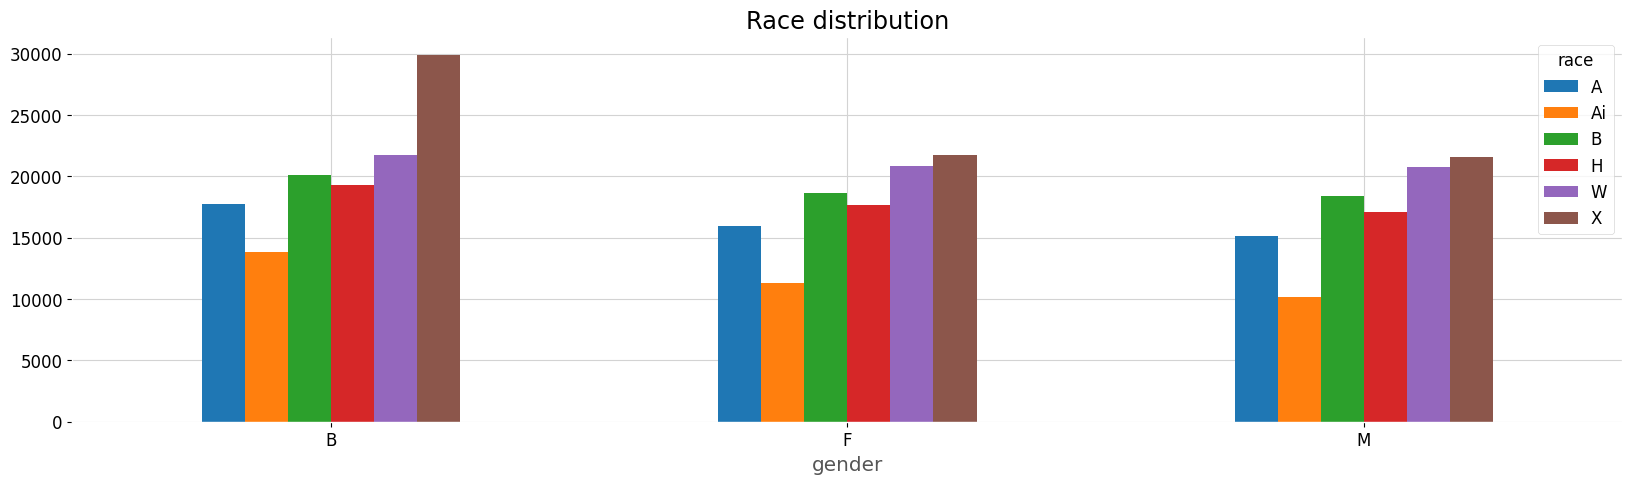

In [370]:
gender_column = df_clean['race']
df_clean.groupby(["gender", gender_column]).size().unstack().plot(kind='bar', title='Race distribution', rot=0)

In [371]:
gender_sub = df_clean.loc[df_clean['race'] != 'B']
gender_sub

,unitid,year,gender,race,grad_100,grad_150,grad_100_rate,grad_150_rate
0,100760,2011,B,X,73.0,105.0,16.4,23.5
18,100760,2012,B,X,40.0,87.0,6.7,14.6
36,100760,2013,B,X,46.0,54.0,7.7,9.1
54,101028,2011,B,X,25.0,42.0,9.6,16.1
72,101028,2012,B,X,41.0,41.0,14.6,14.6
...,...,...,...,...,...,...,...,...
950126,434052,2009,B,X,21.0,27.0,20.2,26.0
950145,443535,2009,B,X,27.0,34.0,23.5,29.6
950272,200785,2009,B,X,38.0,38.0,40.4,40.4
950391,105534,2009,B,X,491.0,546.0,63.7,70.8


### Education with 100 and 150 finnishing rate for year 2013

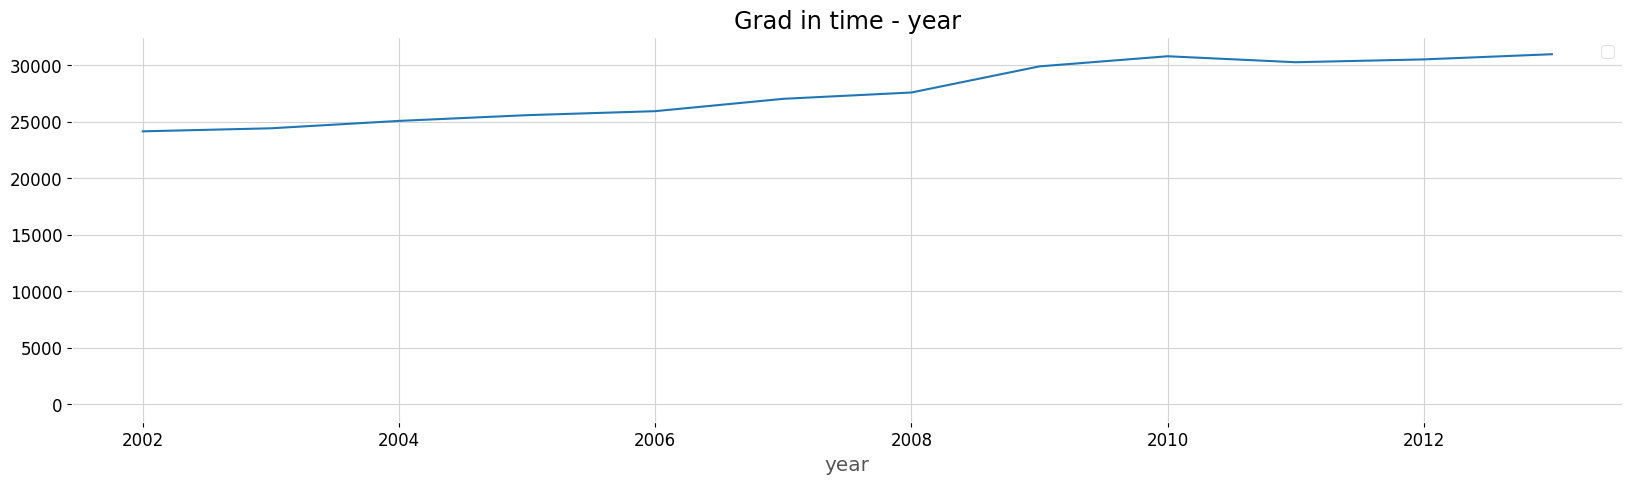

In [372]:
fig, ax = plt.subplots()
col = df_clean['grad_100'] == 2013
df_clean.groupby(['year', col]).size().unstack().plot(kind='line', title='Grad in time - year', ax=ax)
ax.legend([])

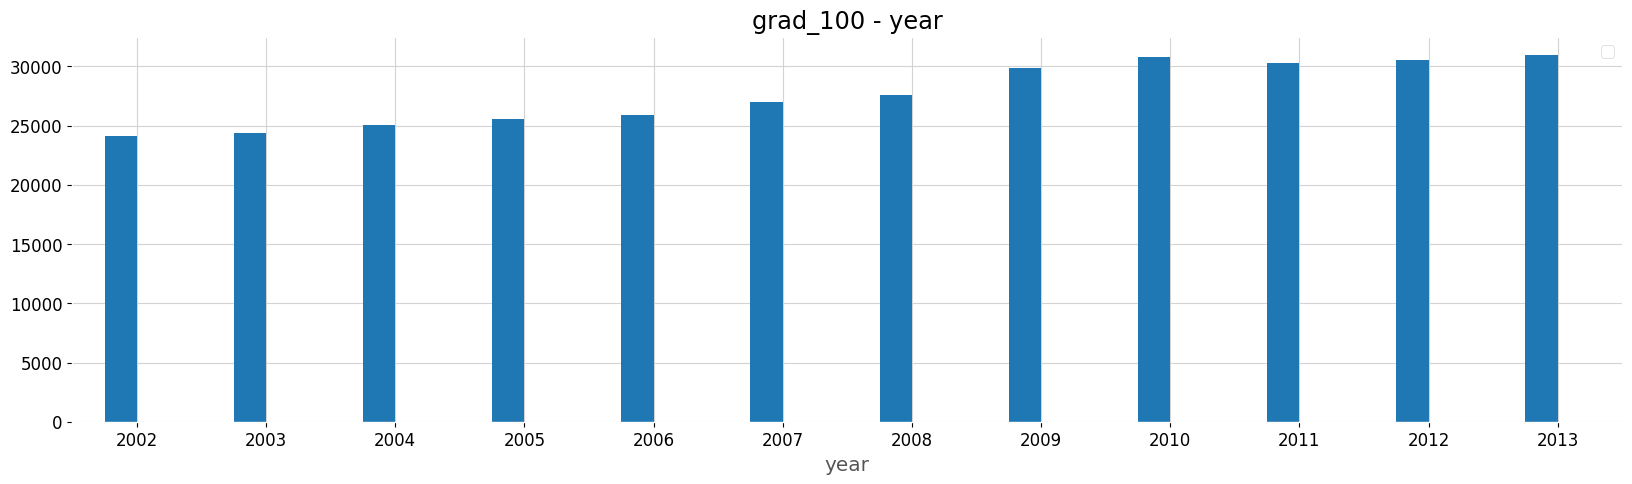

In [373]:
fig, ax = plt.subplots()
col = df_clean['grad_100'] == 2013
df_clean.groupby(['year', col]).size().unstack().plot(kind='bar', title='grad_100 - year', ax=ax, rot=0)
ax.legend([])

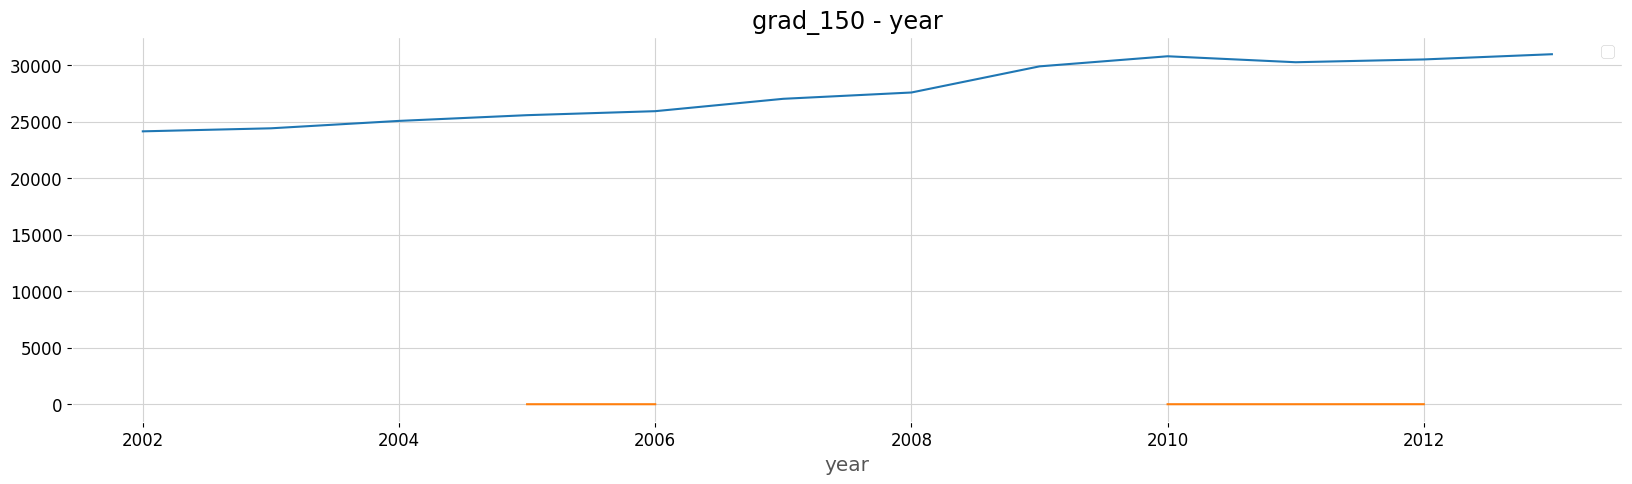

In [374]:
fig, ax = plt.subplots()
col = df_clean['grad_150'] == 2013
df_clean.groupby(['year', col]).size().unstack().plot(kind='line', title='grad_150 - year', ax=ax)
ax.legend([])

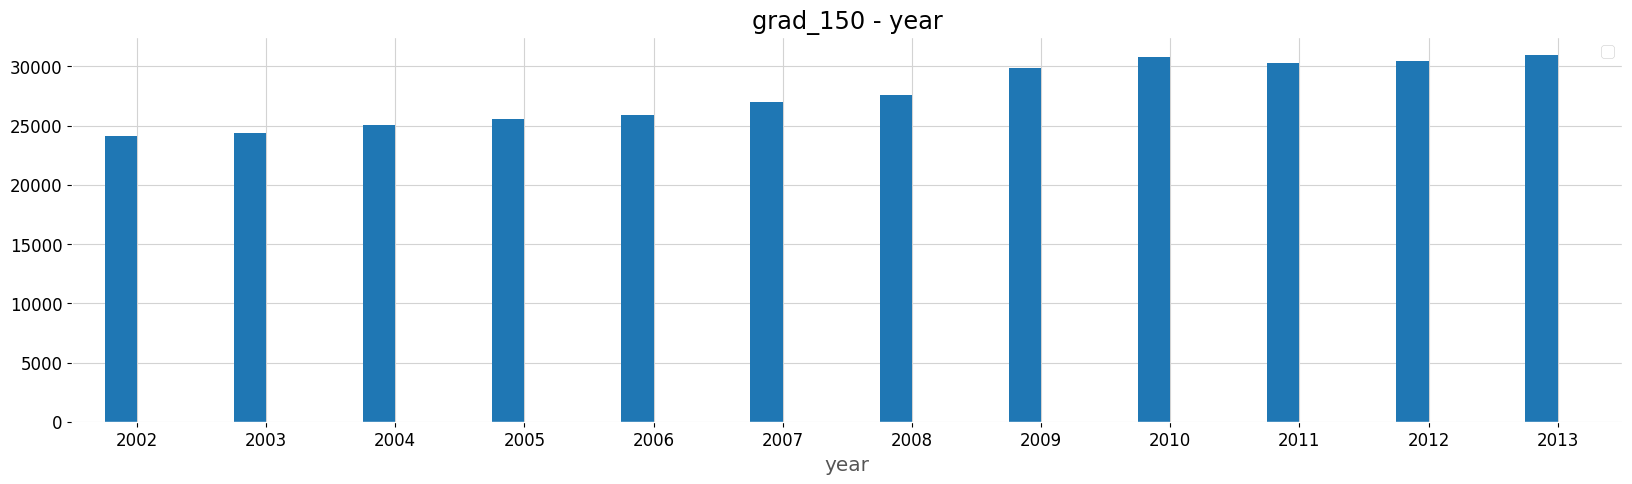

In [375]:
fig, ax = plt.subplots()
col = df_clean['grad_150'] == 2013
df_clean.groupby(['year', col]).size().unstack().plot(kind='bar', title='grad_150 - year', ax=ax, rot=0)
ax.legend([])

### grade 100 for races year 2002

In [376]:
df_2002 = df_clean[df_clean['year'] == 2002]
df_2002.head()

,unitid,year,gender,race,grad_100,grad_150,grad_100_rate,grad_150_rate
607850,100858,2002,B,X,1321.0,2219.0,40.2,67.5
607851,101073,2002,B,X,0.0,0.0,0.0,0.0
607854,102049,2002,B,X,329.0,435.0,50.9,67.3
607855,102261,2002,B,X,12.0,15.0,63.2,78.9
607856,102298,2002,B,X,38.0,65.0,31.1,53.3


In [377]:
x=np.array(df_clean['race'])
x

array(['X', 'X', 'X', ..., 'X', 'X', 'X'], dtype=object)

In [378]:
gender_raw = np.array(df_clean['gender'])
gender_raw

array(['B', 'B', 'B', ..., 'B', 'B', 'B'], dtype=object)

In [379]:
temp_lst_gender = []
temp_lst_all = []

for i in range(len(gender_raw)):
    if gender_raw[i] == 'F' or gender_raw[i] == 'M':
        temp_lst_gender.append(gender_raw[i])
    else:
        temp_lst_all.append(gender_raw[i])

print(len(temp_lst_gender))
print(len(temp_lst_all))

209373
122688


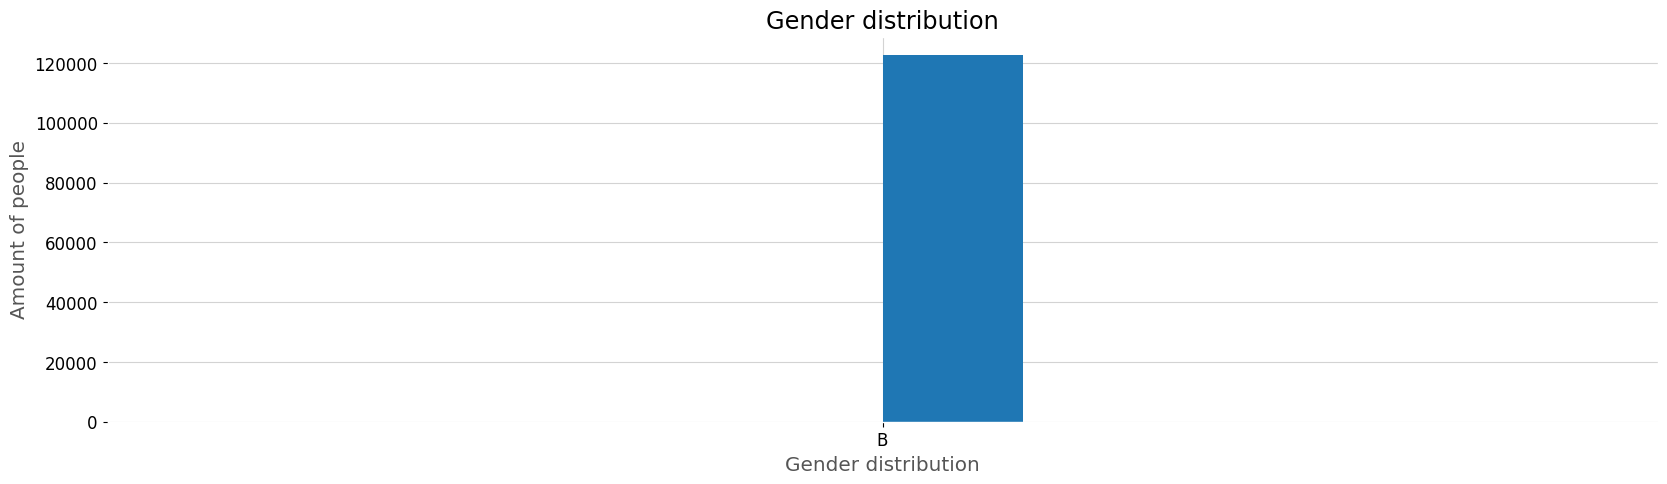

In [380]:
plt.hist(temp_lst_all)
plt.ylim()
plt.yticks()
plt.title('Gender distribution')
plt.ylabel('Amount of people')
plt.xlabel('Gender distribution')
plt.show()

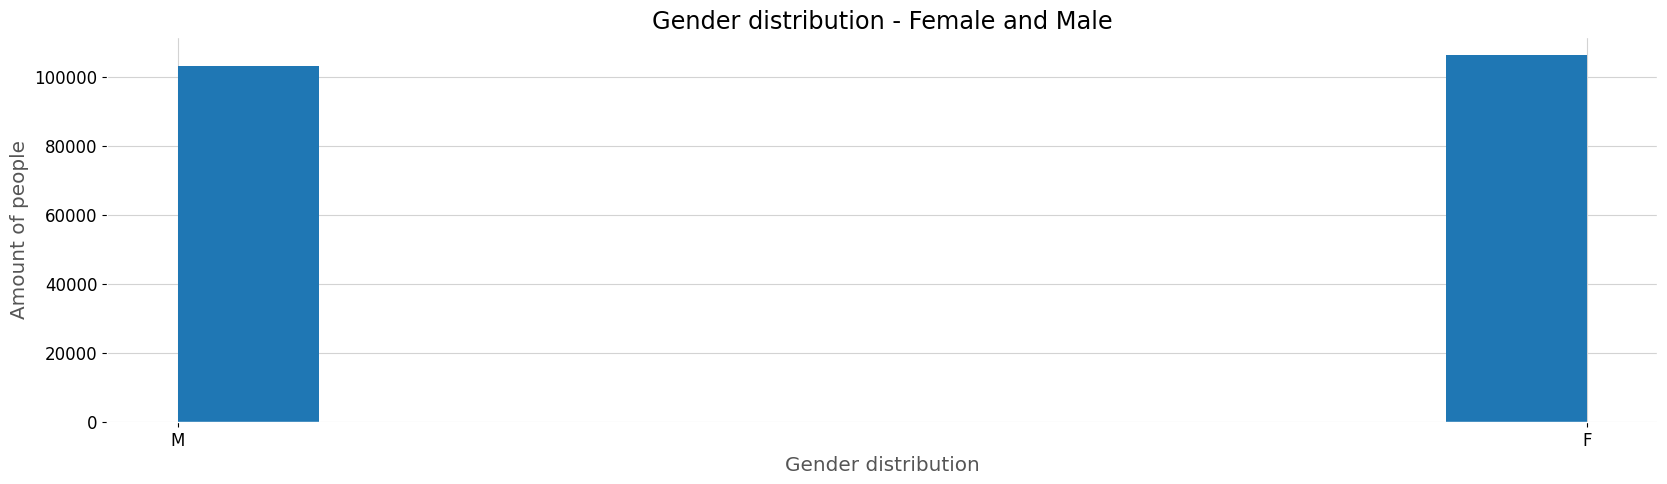

In [381]:
plt.hist(temp_lst_gender)
plt.ylim()
plt.yticks()
plt.title('Gender distribution - Female and Male')
plt.ylabel('Amount of people')
plt.xlabel('Gender distribution')
plt.show()

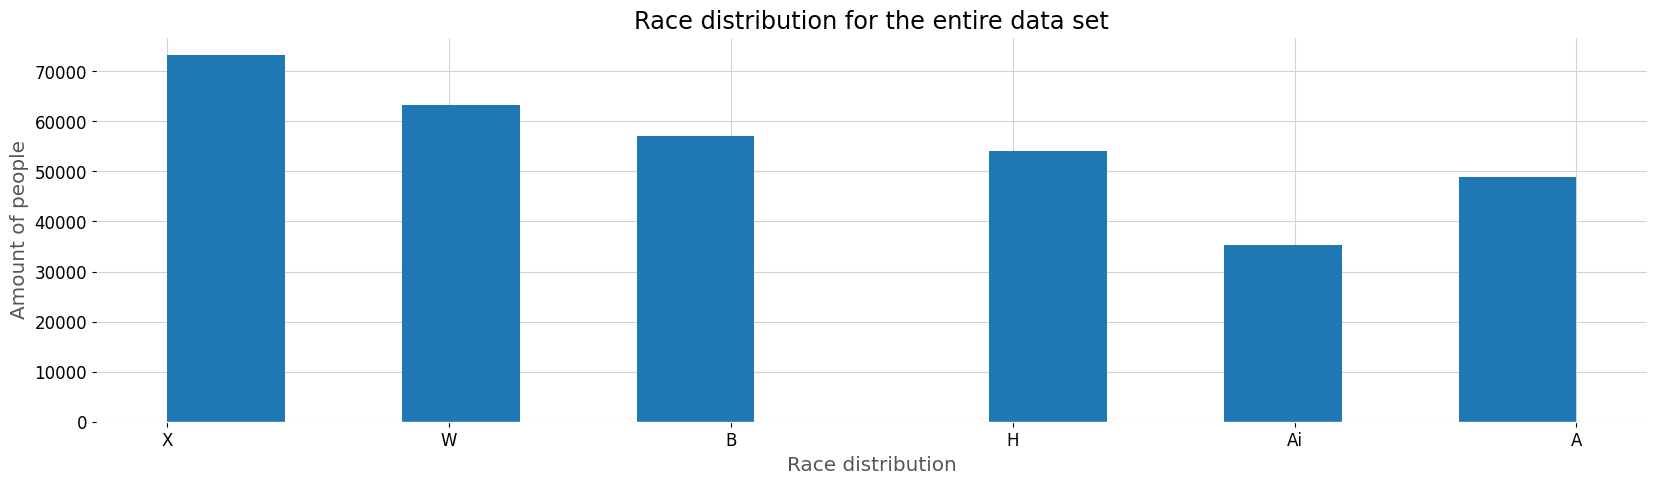

In [382]:
plt.hist(df_clean['race'], bins=12)
plt.ylim()
plt.yticks()
plt.title('Race distribution for the entire data set')
plt.ylabel('Amount of people')
plt.xlabel('Race distribution')
plt.show()

In [383]:
df_clean.corr()

,unitid,year,grad_100,grad_150,grad_100_rate,grad_150_rate
unitid,1.000000,0.105427,-0.055711,-0.061274,-0.086291,-0.122652
year,0.105427,1.000000,0.023729,0.016655,0.013148,-0.006283
grad_100,-0.055711,0.023729,1.000000,0.957501,0.233470,0.246405
grad_150,-0.061274,0.016655,0.957501,1.000000,0.154986,0.211383
grad_100_rate,-0.086291,0.013148,0.233470,0.154986,1.000000,0.805933
grad_150_rate,-0.122652,-0.006283,0.246405,0.211383,0.805933,1.000000


<AxesSubplot:>

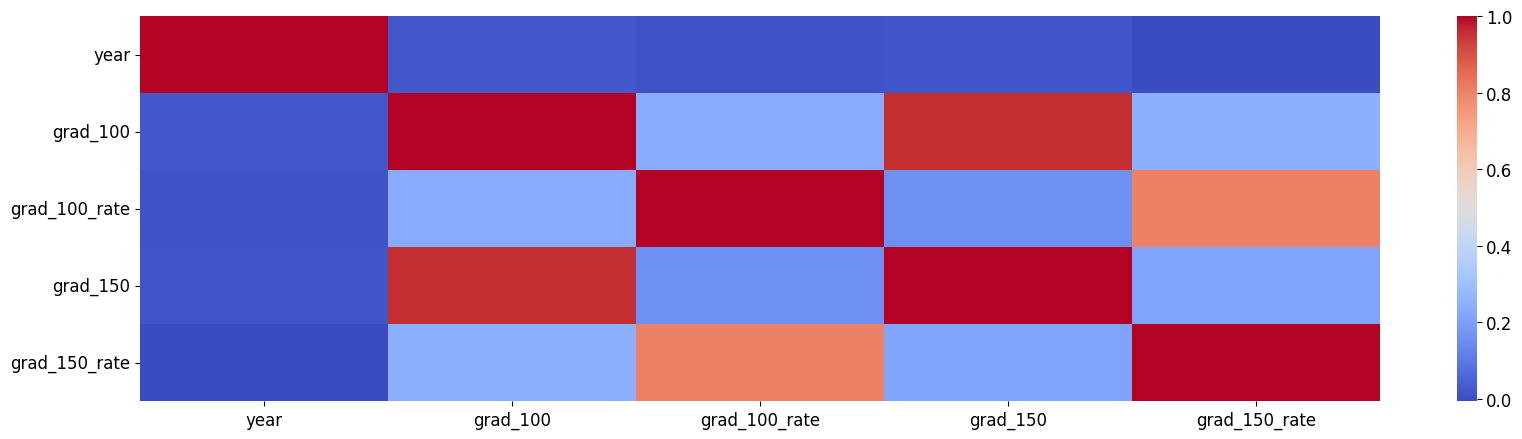

In [384]:
from pandas import DataFrame
index = ['B', 'M', 'F']
cols = ['X','W','B','H','Ai','A']

df_heat = df_clean[['year', 'grad_100', 'grad_100_rate', 'grad_150', 'grad_150_rate']].copy()
df_heat.corr
sns.heatmap(df_heat.corr(), cmap='coolwarm')

In [385]:
corr = df_clean[['year', 'grad_100', 'grad_100_rate', 'grad_150', 'grad_150_rate']].corr() 
corr.style.background_gradient(cmap='Pastel2')

,year,grad_100,grad_100_rate,grad_150,grad_150_rate
year,1.000000,0.023729,0.013148,0.016655,-0.006283
grad_100,0.023729,1.000000,0.233470,0.957501,0.246405
grad_100_rate,0.013148,0.233470,1.000000,0.154986,0.805933
grad_150,0.016655,0.957501,0.154986,1.000000,0.211383
grad_150_rate,-0.006283,0.246405,0.805933,0.211383,1.000000


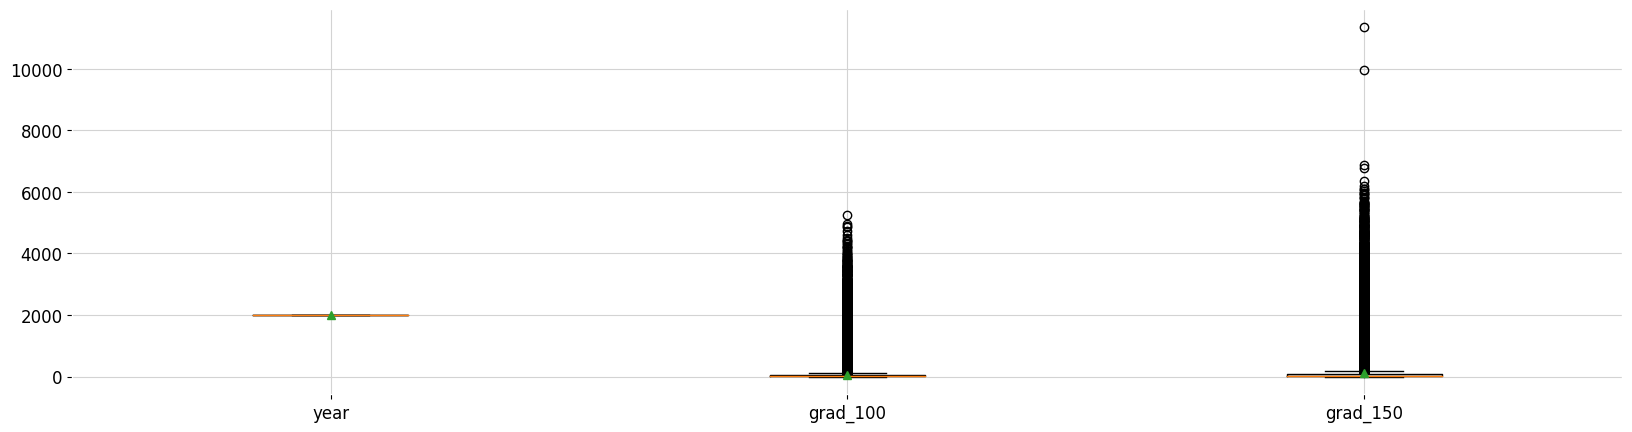

In [386]:
from matplotlib import pyplot

names = ['year', 'grad_100', 'grad_150']
df_box = df_clean[['year', 'grad_100', 'grad_150']]

pyplot.boxplot(df_box, labels=names, showmeans=True)
pyplot.show()

In [387]:
all_data = df_clean[['grad_100', 'grad_150', 'grad_100_rate', 'grad_150_rate']].describe().T
all_data

,count,mean,std,min,25%,50%,75%,max
grad_100,332061.0,64.408247,196.020873,0.0,1.0,5.0,41.0,5243.0
grad_150,332061.0,101.702982,294.053655,0.0,1.0,9.0,73.0,11367.0
grad_100_rate,332061.0,30.209467,28.159988,0.0,4.3,24.7,50.0,100.0
grad_150_rate,332061.0,45.861344,29.023881,0.0,25.0,47.0,66.7,100.0


## Statistics on race

Descriptive statistics with mean and standard deviation for the specific races and all students

### Asians

In [388]:
asian = df_clean.loc[df_clean['race'] == 'A'].copy()
asian.head()

,unitid,year,gender,race,grad_100,grad_150,grad_100_rate,grad_150_rate
205107,100654,2011,B,A,1.0,1.0,100.0,100.0
205108,100654,2011,M,A,1.0,1.0,100.0,100.0
205125,100654,2012,B,A,0.0,1.0,0.0,100.0
205127,100654,2012,F,A,0.0,1.0,0.0,100.0
205161,100663,2011,B,A,29.0,53.0,38.2,69.7


In [389]:
des_asian = asian[['grad_100', 'grad_150', 'grad_100_rate', 'grad_150_rate']].describe().T
des_asian

,count,mean,std,min,25%,50%,75%,max
grad_100,48926.0,15.728978,61.906351,0.0,0.0,2.0,7.0,1964.0
grad_150,48926.0,24.842946,91.399478,0.0,1.0,3.0,12.0,2425.0
grad_100_rate,48926.0,34.562439,32.075523,0.0,0.0,28.6,55.6,100.0
grad_150_rate,48926.0,51.002422,32.578221,0.0,28.6,50.0,75.0,100.0


In [390]:
asian_grad = asian[['grad_100', 'grad_150']].copy()

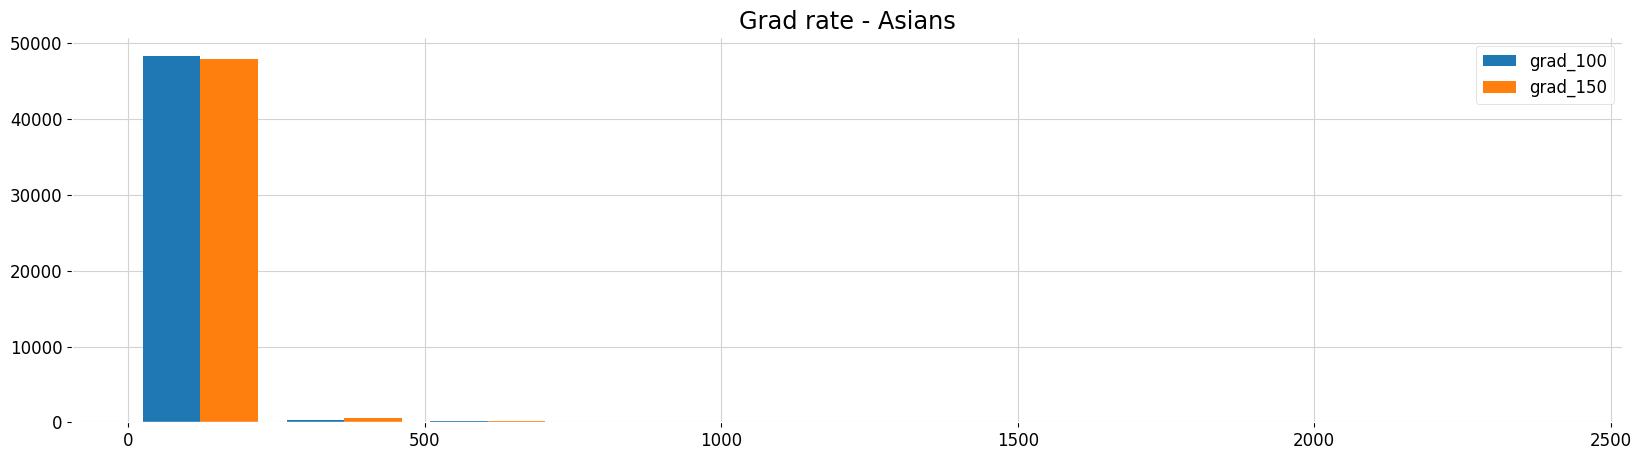

In [391]:
fig, ax = plt.subplots()
ax.hist(asian_grad)
names = ['grad_100', 'grad_150']
plt.title('Grad rate - Asians')
plt.legend(names)

#### Asian - Females

In [392]:
asian_female = asian.loc[asian['gender'] == 'F'].copy()
af_data = asian_female[['grad_100', 'grad_150', 'grad_100_rate', 'grad_150_rate']].describe().T
af_data

,count,mean,std,min,25%,50%,75%,max
grad_100,15977.0,14.219628,51.350539,0.0,0.0,2.0,7.0,1164.0
grad_150,15977.0,21.135758,71.619935,0.0,1.0,3.0,11.0,1381.0
grad_100_rate,15977.0,38.609670,33.284244,0.0,0.0,33.3,63.6,100.0
grad_150_rate,15977.0,54.444483,33.131761,0.0,33.3,57.1,81.0,100.0


In [393]:
asian_grad_f = asian_female[['grad_100', 'grad_150']].copy()

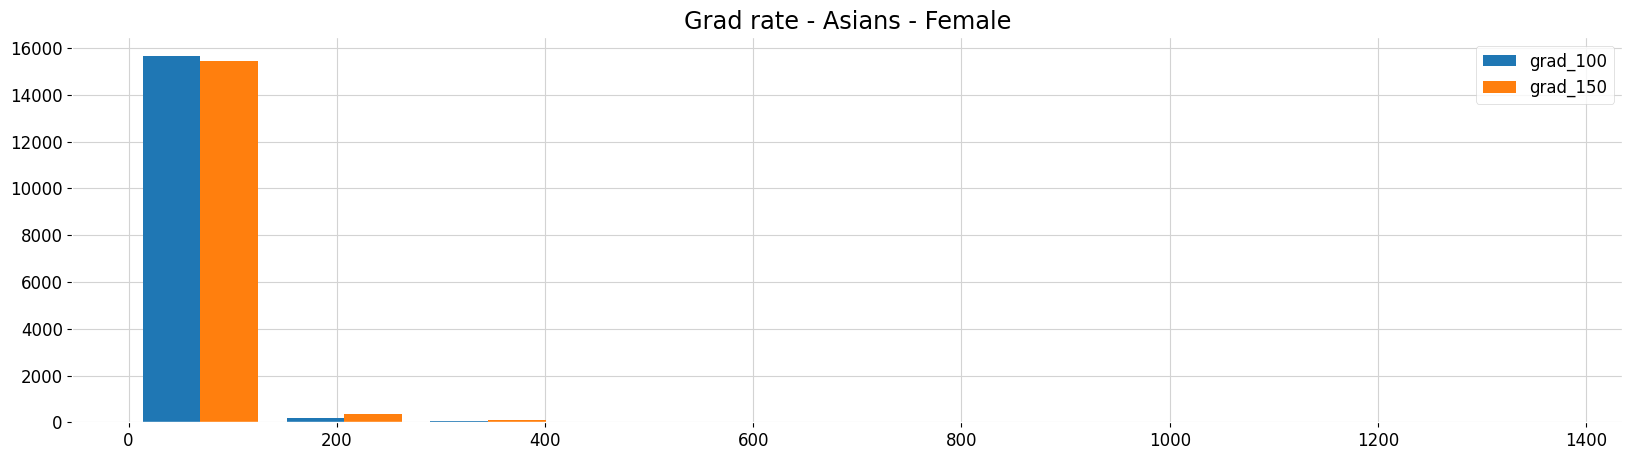

In [394]:
fig, ax = plt.subplots()
ax.hist(asian_grad_f)
names = ['grad_100', 'grad_150']
plt.title('Grad rate - Asians - Female')
plt.legend(names)

#### Asian - Male

In [395]:
asian_male = asian.loc[asian['gender'] == 'M'].copy()
am_data = asian_male[['grad_100', 'grad_150', 'grad_100_rate', 'grad_150_rate']].describe().T
am_data

,count,mean,std,min,25%,50%,75%,max
grad_100,15164.0,10.392443,37.653014,0.0,0.0,1.0,5.0,818.0
grad_150,15164.0,17.808428,60.022695,0.0,1.0,2.0,9.0,1102.0
grad_100_rate,15164.0,30.758962,32.211077,0.0,0.0,22.2,50.0,100.0
grad_150_rate,15164.0,48.099875,33.647816,0.0,20.0,50.0,75.0,100.0


In [396]:
asian_grad_m = asian_male[['grad_100', 'grad_150']].copy()

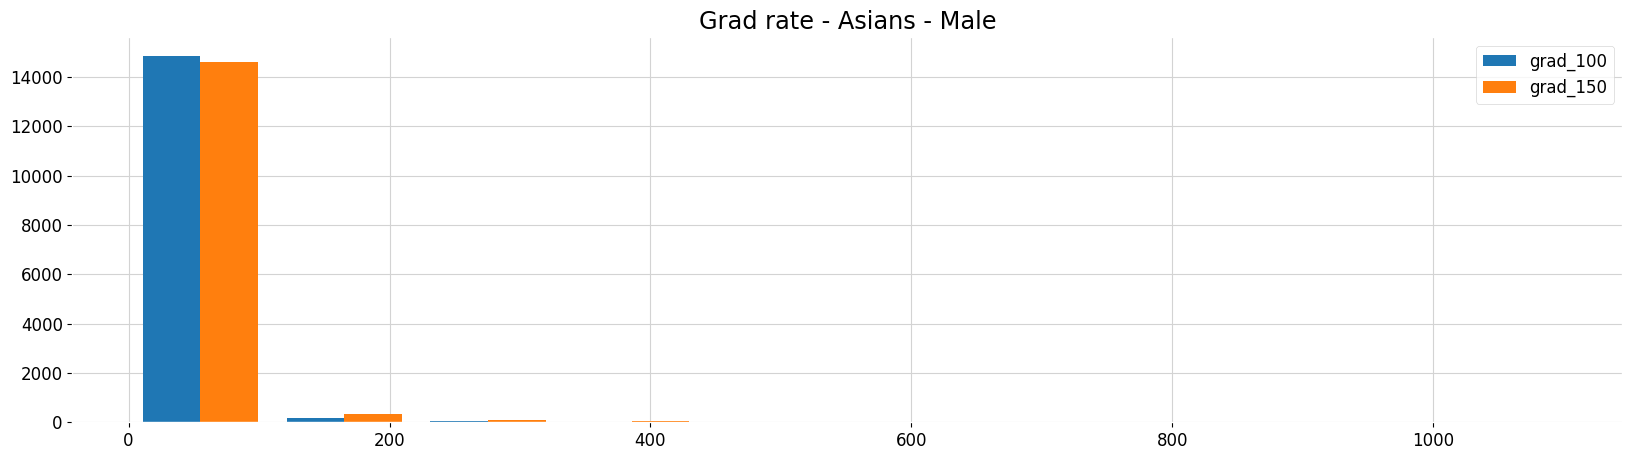

In [397]:
fig, ax = plt.subplots()
ax.hist(asian_grad_m)
names = ['grad_100', 'grad_150']
plt.title('Grad rate - Asians - Male')
plt.legend(names)

### Grad for Asian - female/male

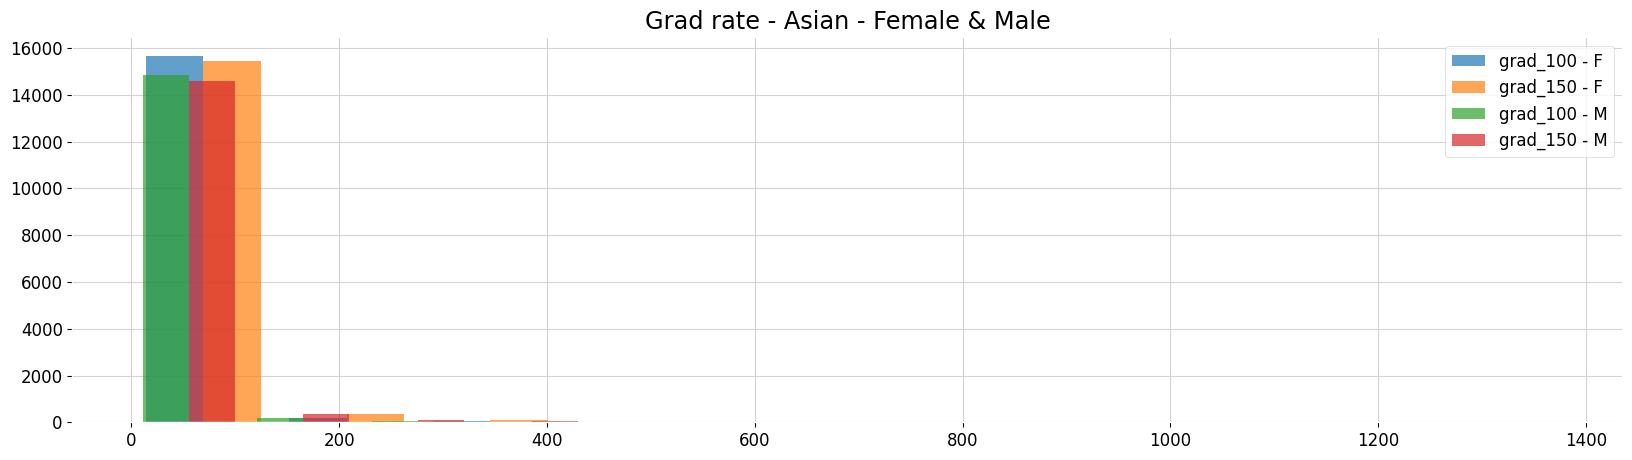

In [398]:
fig, ax = plt.subplots()
ax.hist(asian_grad_f, alpha=0.7)
ax.hist(asian_grad_m, alpha=0.7)
names = ['grad_100 - F', 'grad_150 - F', 'grad_100 - M', 'grad_150 - M']
plt.title('Grad rate - Asian - Female & Male')
plt.legend(names)

### American Indian

In [399]:
american_indian = df_clean.loc[df_clean['race'] == 'Ai'].copy()
american_indian.head()

,unitid,year,gender,race,grad_100,grad_150,grad_100_rate,grad_150_rate
205104,100654,2011,B,Ai,0.0,0.0,0.0,0.0
205105,100654,2011,M,Ai,0.0,0.0,0.0,0.0
205106,100654,2011,F,Ai,0.0,0.0,0.0,0.0
205140,100654,2013,B,Ai,0.0,0.0,0.0,0.0
205142,100654,2013,F,Ai,0.0,0.0,0.0,0.0


In [400]:
des_ai = american_indian[['grad_100', 'grad_150', 'grad_100_rate', 'grad_150_rate']].describe().T
des_ai

,count,mean,std,min,25%,50%,75%,max
grad_100,35377.0,1.262515,3.120366,0.0,0.0,0.0,1.0,91.0
grad_150,35377.0,2.371654,6.263803,0.0,0.0,1.0,2.0,177.0
grad_100_rate,35377.0,25.562077,34.840714,0.0,0.0,0.0,50.0,100.0
grad_150_rate,35377.0,40.544283,38.180293,0.0,0.0,33.3,70.0,100.0


In [401]:
ai_grad = american_indian[['grad_100', 'grad_150']].copy()

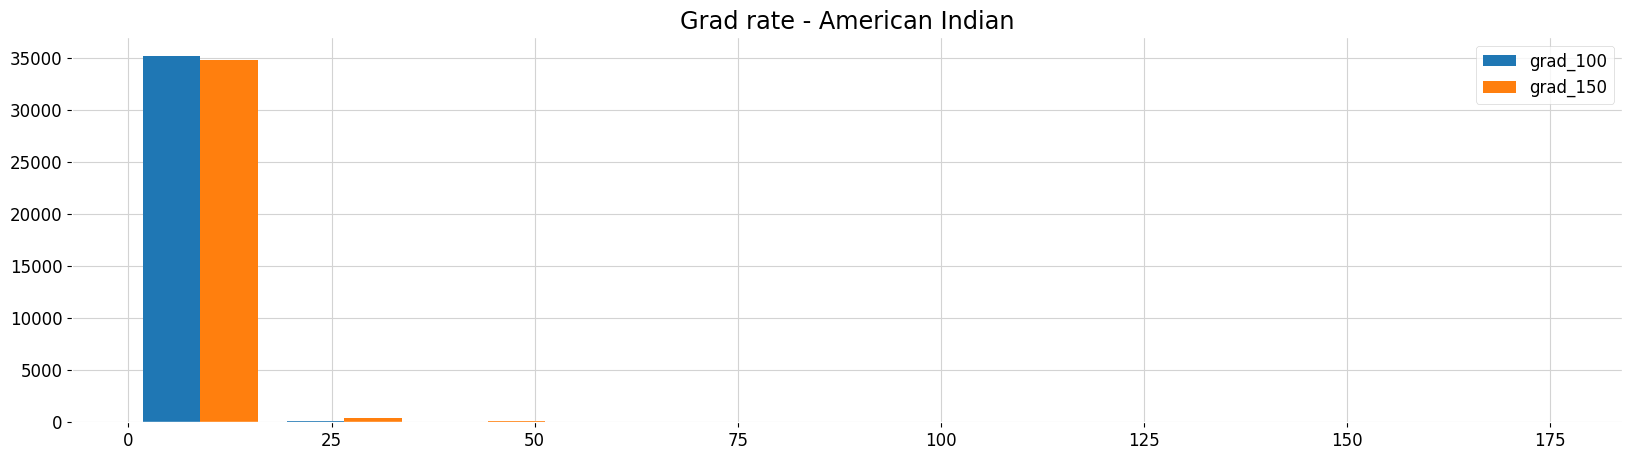

In [402]:
fig, ax = plt.subplots()
ax.hist(ai_grad)
names = ['grad_100', 'grad_150']
plt.title('Grad rate - American Indian')
plt.legend(names)

#### American Indian - Female

In [403]:
american_indian_fe = american_indian.loc[american_indian['gender'] == 'F'].copy()
aif_data = american_indian_fe[['grad_100', 'grad_150', 'grad_100_rate', 'grad_150_rate']].describe().T
aif_data

,count,mean,std,min,25%,50%,75%,max
grad_100,11324.0,1.264394,2.885865,0.0,0.0,1.0,1.0,59.0
grad_150,11324.0,2.214677,5.323759,0.0,0.0,1.0,2.0,103.0
grad_100_rate,11324.0,28.289474,36.351706,0.0,0.0,4.1,50.0,100.0
grad_150_rate,11324.0,42.531906,39.051478,0.0,0.0,40.0,76.5,100.0


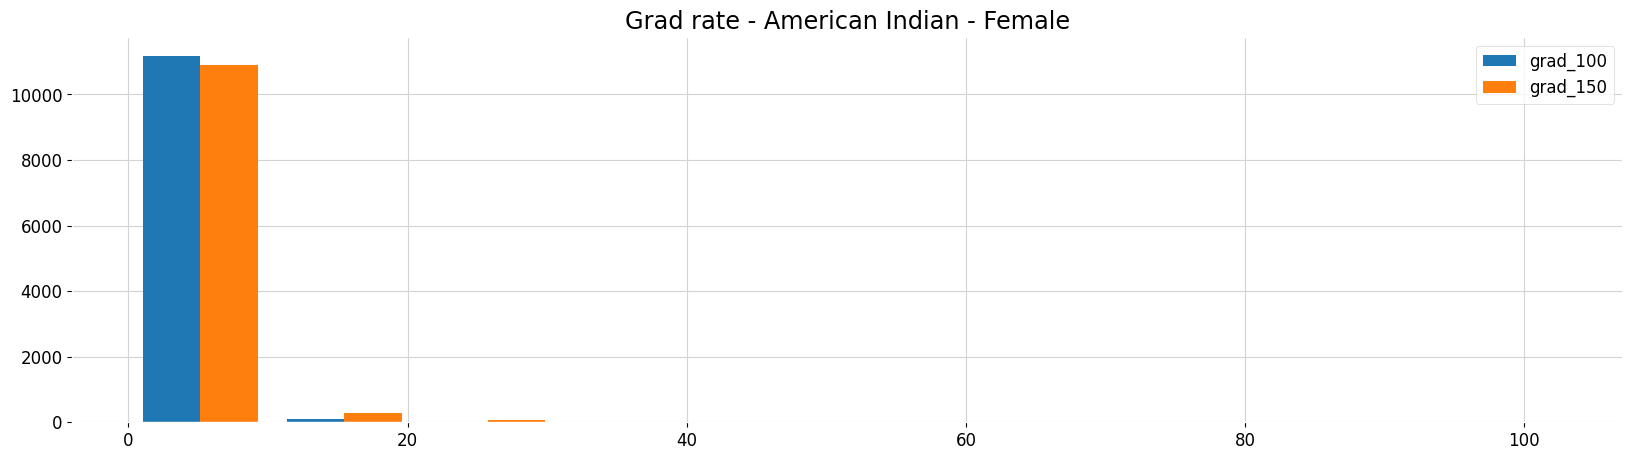

In [404]:
ai_grad_f = american_indian_fe[['grad_100', 'grad_150']].copy()

fig, ax = plt.subplots()
ax.hist(ai_grad_f)
names = ['grad_100', 'grad_150']
plt.title('Grad rate - American Indian - Female')
plt.legend(names)

#### American Indian - Male

In [405]:
american_indian_m = american_indian.loc[american_indian['gender'] == 'M'].copy()
aim_data = american_indian_m[['grad_100', 'grad_150', 'grad_100_rate', 'grad_150_rate']].describe().T
aim_data

,count,mean,std,min,25%,50%,75%,max
grad_100,10185.0,0.786843,1.751339,0.0,0.0,0.0,1.0,32.0
grad_150,10185.0,1.656554,3.887264,0.0,0.0,1.0,2.0,80.0
grad_100_rate,10185.0,22.070702,34.401723,0.0,0.0,0.0,33.3,100.0
grad_150_rate,10185.0,38.538115,39.241131,0.0,0.0,33.3,66.7,100.0


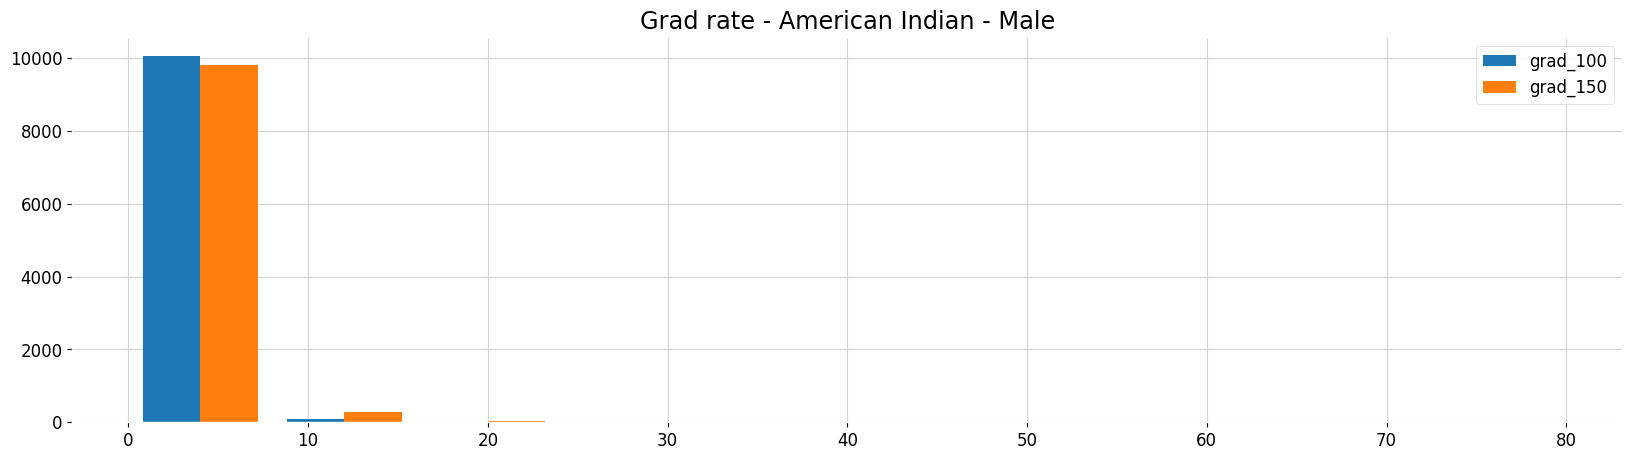

In [406]:
ai_grad_m = american_indian_m[['grad_100', 'grad_150']].copy()

fig, ax = plt.subplots()
ax.hist(ai_grad_m)
names = ['grad_100', 'grad_150']
plt.title('Grad rate - American Indian - Male')
plt.legend(names)

#### Grad for all American Indian - female/male

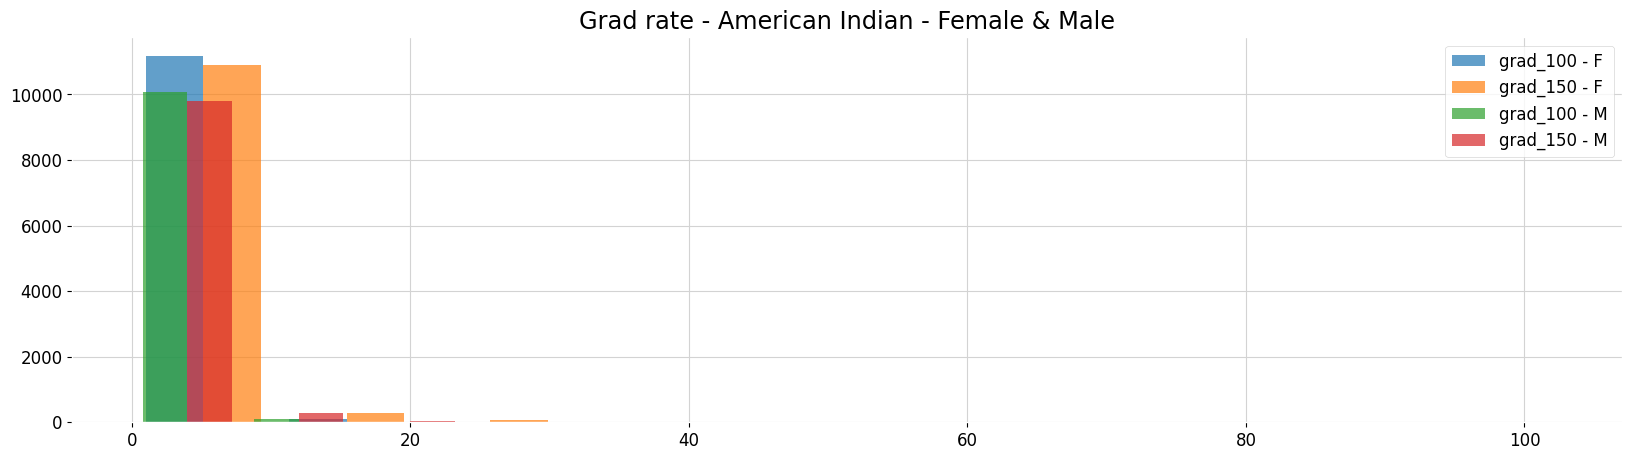

In [407]:
fig, ax = plt.subplots()
ax.hist(ai_grad_f, alpha=0.7)
ax.hist(ai_grad_m, alpha=0.7)
names = ['grad_100 - F', 'grad_150 - F', 'grad_100 - M', 'grad_150 - M']
plt.title('Grad rate - American Indian - Female & Male')
plt.legend(names)

### Black

In [408]:
black = df_clean.loc[df_clean['race'] == 'B'].copy()
black.head()

,unitid,year,gender,race,grad_100,grad_150,grad_100_rate,grad_150_rate
205098,100654,2011,B,B,113.0,336.0,10.7,31.8
205099,100654,2011,M,B,25.0,127.0,5.0,25.4
205100,100654,2011,F,B,88.0,209.0,15.8,37.5
205116,100654,2012,B,B,107.0,359.0,9.7,32.5
205117,100654,2012,M,B,27.0,142.0,5.1,26.6


In [409]:
des_black = black[['grad_100', 'grad_150', 'grad_100_rate', 'grad_150_rate']].describe().T
des_black

,count,mean,std,min,25%,50%,75%,max
grad_100,57133.0,11.158840,28.920033,0.0,0.0,2.0,9.0,625.0
grad_150,57133.0,22.056290,52.663192,0.0,1.0,5.0,18.0,1002.0
grad_100_rate,57133.0,23.656715,25.983476,0.0,0.0,15.6,35.7,100.0
grad_150_rate,57133.0,39.432983,28.195847,0.0,18.2,36.8,57.1,100.0


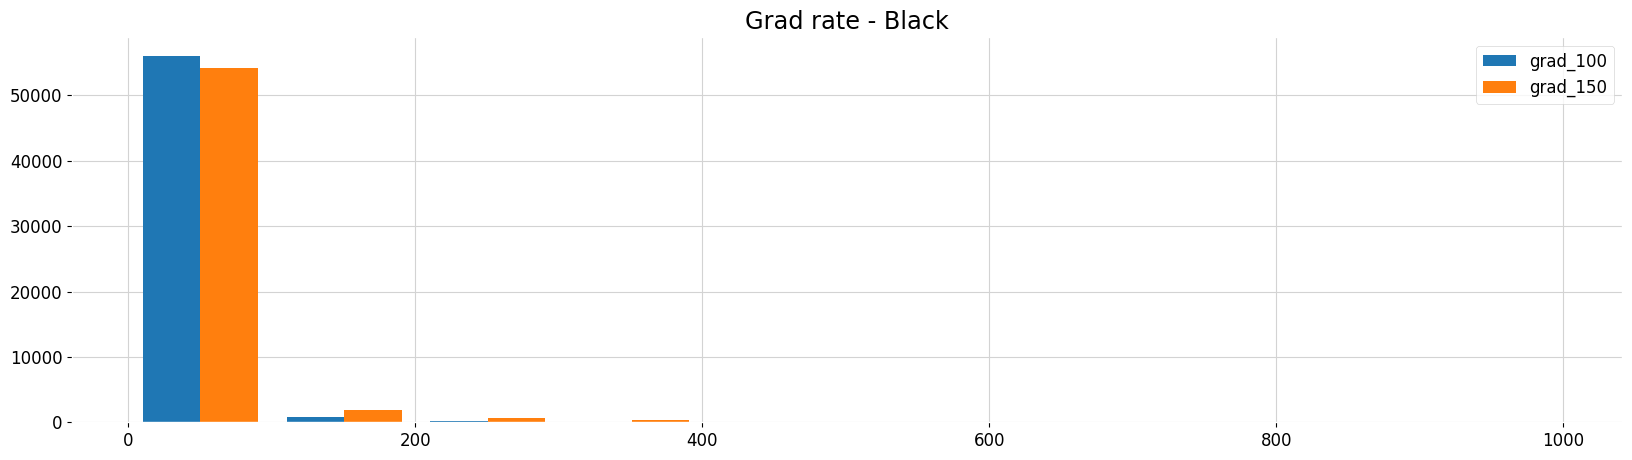

In [410]:
black_grad = black[['grad_100', 'grad_150']].copy()

fig, ax = plt.subplots()
ax.hist(black_grad)
names = ['grad_100', 'grad_150']
plt.title('Grad rate - Black')
plt.legend(names)

#### Black - Female

In [411]:
black_f = black.loc[black['gender'] == 'F'].copy()
bf_data = black_f[['grad_100', 'grad_150', 'grad_100_rate', 'grad_150_rate']].describe().T
bf_data

,count,mean,std,min,25%,50%,75%,max
grad_100,18641.0,12.076552,29.079879,0.0,0.0,3.0,10.0,501.0
grad_150,18641.0,22.168124,49.386777,0.0,1.0,5.0,19.0,667.0
grad_100_rate,18641.0,27.740550,27.971674,0.0,0.0,20.0,42.9,100.0
grad_150_rate,18641.0,43.143335,29.460694,0.0,21.4,41.9,63.4,100.0


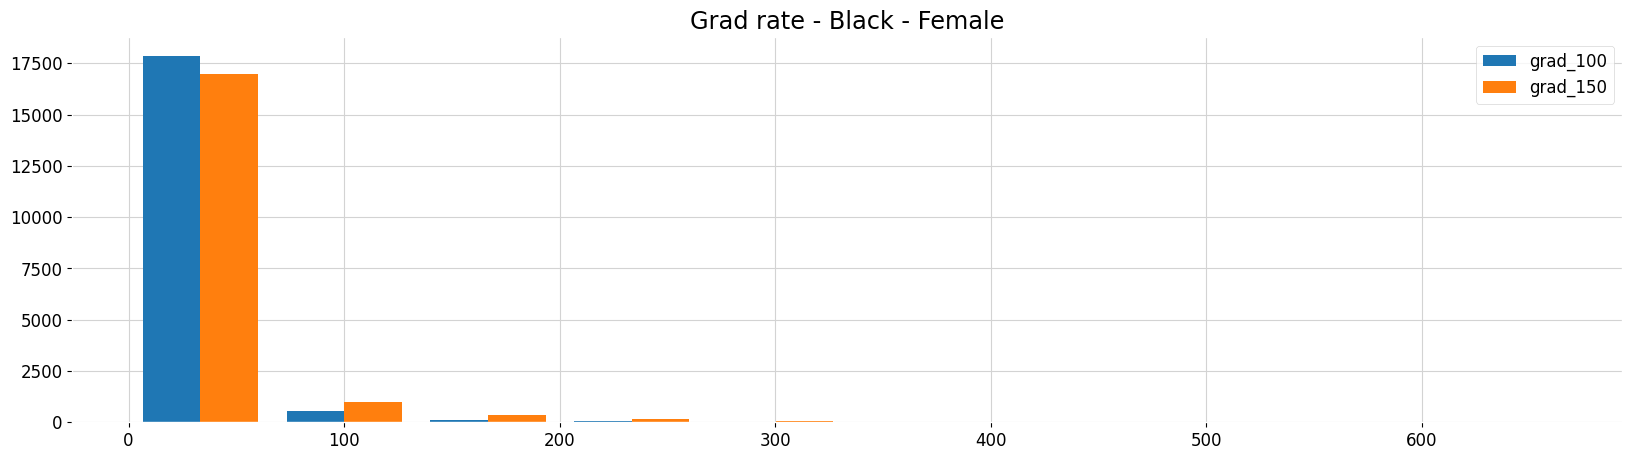

In [412]:
black_grad_f = black_f[['grad_100', 'grad_150']].copy()

fig, ax = plt.subplots()
ax.hist(black_grad_f)
names = ['grad_100', 'grad_150']
plt.title('Grad rate - Black - Female')
plt.legend(names)

#### Black - Male

In [413]:
black_m = black.loc[black['gender'] == 'M'].copy()
bm_data = black_m[['grad_100', 'grad_150', 'grad_100_rate', 'grad_150_rate']].describe().T
bm_data

,count,mean,std,min,25%,50%,75%,max
grad_100,18366.0,5.099096,11.927674,0.0,0.0,1.0,5.0,281.0
grad_150,18366.0,11.806327,25.022157,0.0,1.0,4.0,11.0,427.0
grad_100_rate,18366.0,19.397185,24.622967,0.0,0.0,10.0,28.6,100.0
grad_150_rate,18366.0,35.797000,28.166764,0.0,14.3,33.3,50.0,100.0


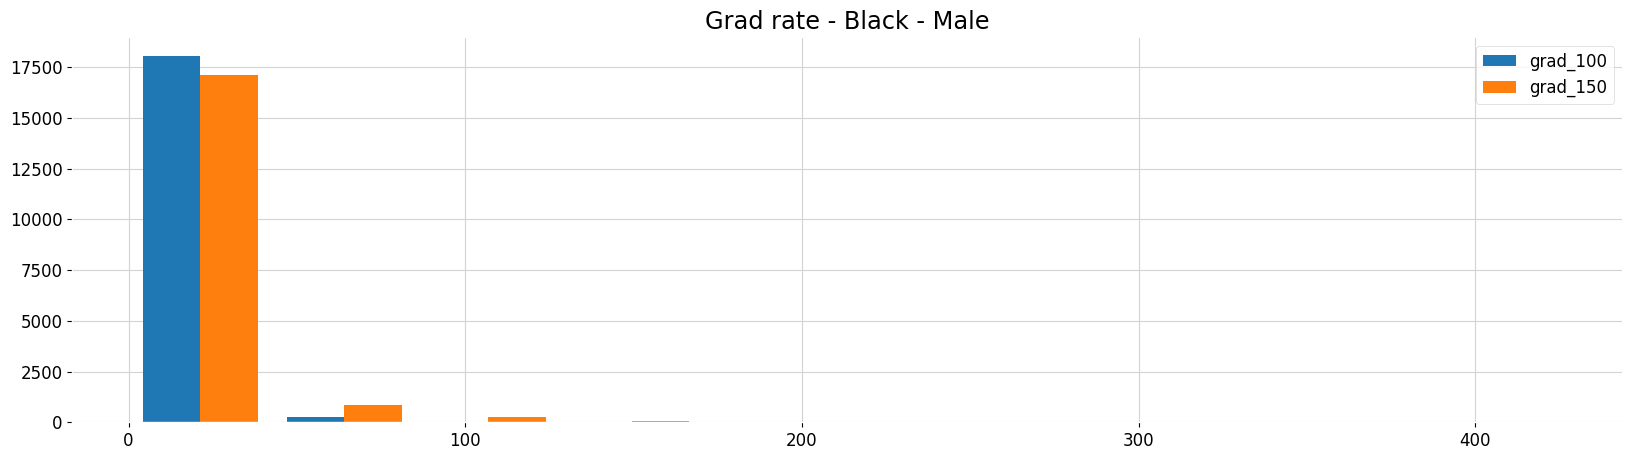

In [414]:
black_grad_m = black_m[['grad_100', 'grad_150']].copy()

fig, ax = plt.subplots()
ax.hist(black_grad_m)
names = ['grad_100', 'grad_150']
plt.title('Grad rate - Black - Male')
plt.legend(names)

#### Grad for all black - female/male

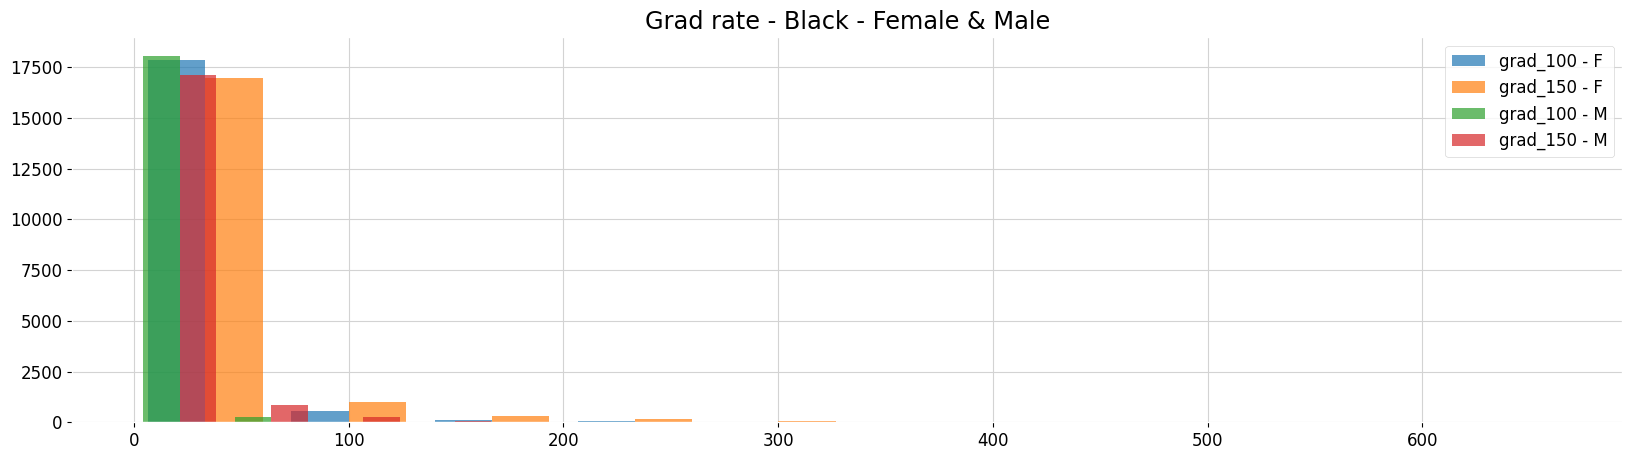

In [415]:
fig, ax = plt.subplots()
ax.hist(black_grad_f, alpha=0.7)
ax.hist(black_grad_m, alpha=0.7)
names = ['grad_100 - F', 'grad_150 - F', 'grad_100 - M', 'grad_150 - M']
plt.title('Grad rate - Black - Female & Male')
plt.legend(names)

### Hispanic

In [416]:
hispanic = df_clean.loc[df_clean['race'] == 'H'].copy()
hispanic.head()

,unitid,year,gender,race,grad_100,grad_150,grad_100_rate,grad_150_rate
205101,100654,2011,B,H,0.0,2.0,0.0,33.3
205102,100654,2011,M,H,0.0,1.0,0.0,33.3
205103,100654,2011,F,H,0.0,1.0,0.0,33.3
205119,100654,2012,B,H,1.0,1.0,25.0,25.0
205120,100654,2012,M,H,1.0,1.0,50.0,50.0


In [417]:
des_hispanic = hispanic[['grad_100', 'grad_150', 'grad_100_rate', 'grad_150_rate']].describe().T
des_hispanic

,count,mean,std,min,25%,50%,75%,max
grad_100,54033.0,9.517591,26.747724,0.0,0.0,2.0,7.0,645.0
grad_150,54033.0,17.665834,50.997360,0.0,1.0,3.0,12.0,1318.0
grad_100_rate,54033.0,28.277939,28.775357,0.0,0.0,20.3,48.3,100.0
grad_150_rate,54033.0,44.228725,30.332163,0.0,21.9,44.3,66.7,100.0


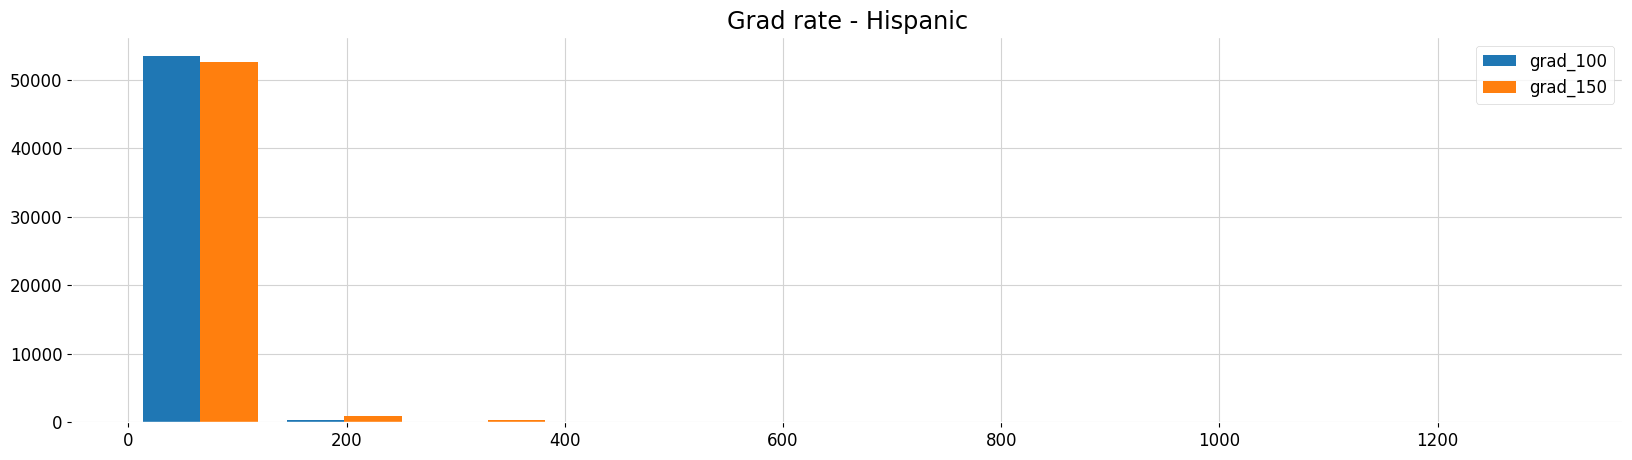

In [418]:
hispanic_grad = hispanic[['grad_100', 'grad_150']].copy()

fig, ax = plt.subplots()
ax.hist(hispanic_grad)
names = ['grad_100', 'grad_150']
plt.title('Grad rate - Hispanic')
plt.legend(names)

#### Hispanic - Female

In [419]:
hispanic_f = hispanic.loc[hispanic['gender'] == 'F'].copy()
hf_data = hispanic_f[['grad_100', 'grad_150', 'grad_100_rate', 'grad_150_rate']].describe().T
hf_data

,count,mean,std,min,25%,50%,75%,max
grad_100,17665.0,9.353241,24.187552,0.0,0.0,2.0,7.0,439.0
grad_150,17665.0,16.491367,44.191282,0.0,1.0,3.0,12.0,810.0
grad_100_rate,17665.0,32.257453,30.531691,0.0,0.0,25.0,50.0,100.0
grad_150_rate,17665.0,47.740702,31.126252,0.0,25.0,50.0,69.7,100.0


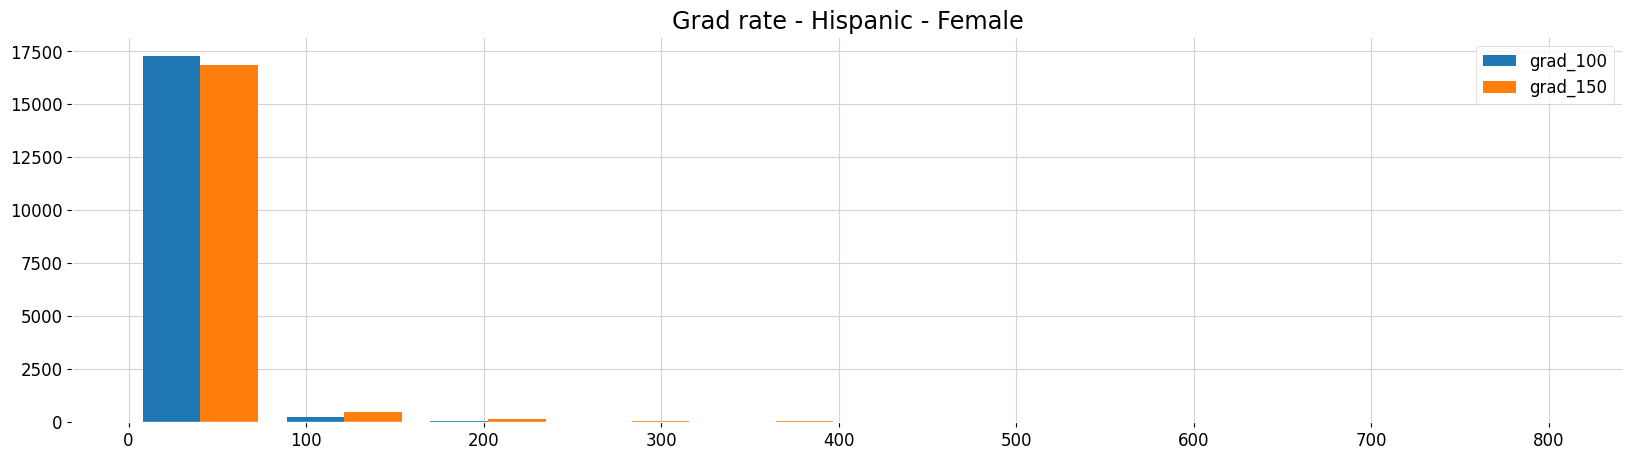

In [420]:
hispanic_grad_f = hispanic_f[['grad_100', 'grad_150']].copy()

fig, ax = plt.subplots()
ax.hist(hispanic_grad_f)
names = ['grad_100', 'grad_150']
plt.title('Grad rate - Hispanic - Female')
plt.legend(names)

#### Hispanic - Male

In [421]:
hispanic_m = hispanic.loc[hispanic['gender'] == 'M'].copy()
hm_data = hispanic_m[['grad_100', 'grad_150', 'grad_100_rate', 'grad_150_rate']].describe().T
hm_data

,count,mean,std,min,25%,50%,75%,max
grad_100,17093.0,5.376879,13.811492,0.0,0.0,1.0,4.0,267.0
grad_150,17093.0,10.878664,28.271808,0.0,1.0,2.0,8.0,508.0
grad_100_rate,17093.0,24.234535,28.197608,0.0,0.0,14.3,40.0,100.0
grad_150_rate,17093.0,40.962183,31.219804,0.0,15.9,38.9,62.5,100.0


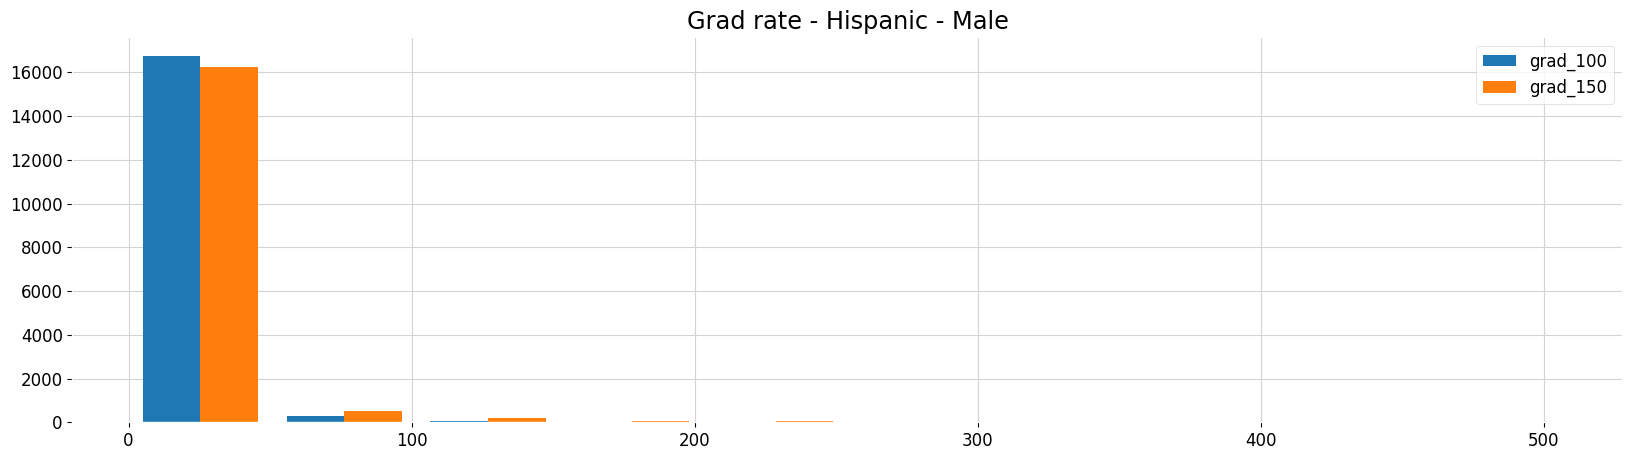

In [422]:
hispanic_grad_m = hispanic_m[['grad_100', 'grad_150']].copy()

fig, ax = plt.subplots()
ax.hist(hispanic_grad_m)
names = ['grad_100', 'grad_150']
plt.title('Grad rate - Hispanic - Male')
plt.legend(names)

#### Grad for all hispanic - female/male

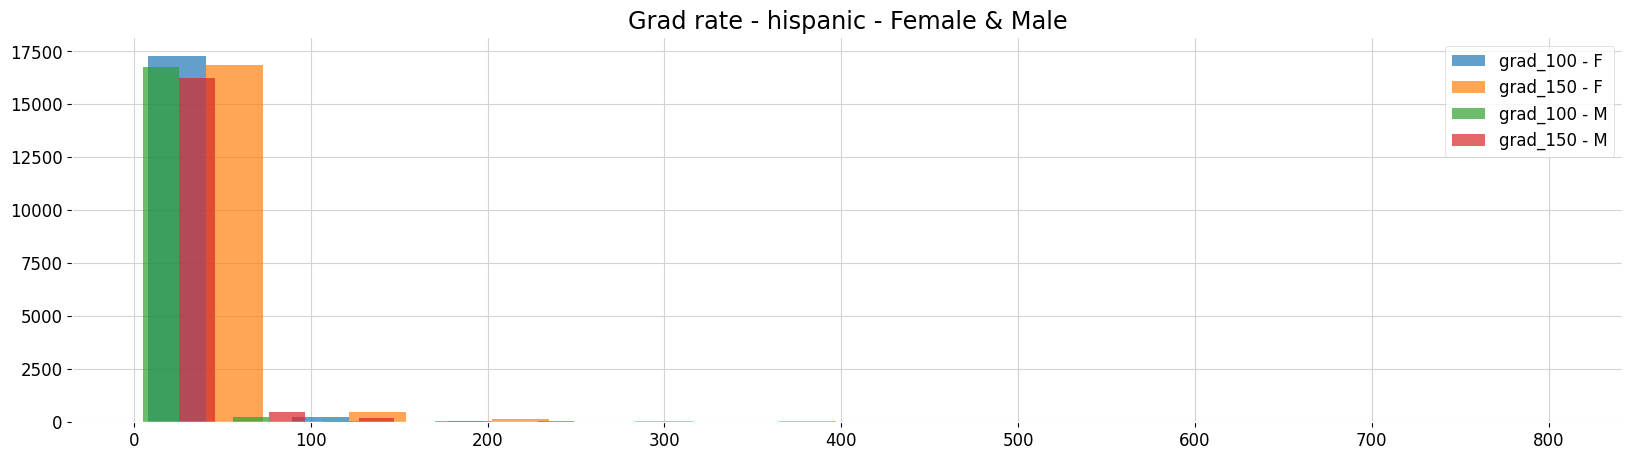

In [423]:
fig, ax = plt.subplots()
ax.hist(hispanic_grad_f, alpha=0.7)
ax.hist(hispanic_grad_m, alpha=0.7)
names = ['grad_100 - F', 'grad_150 - F', 'grad_100 - M', 'grad_150 - M']
plt.title('Grad rate - hispanic - Female & Male')
plt.legend(names)

### White

In [424]:
white = df_clean.loc[df_clean['race'] == 'W'].copy()
white.head()

,unitid,year,gender,race,grad_100,grad_150,grad_100_rate,grad_150_rate
205095,100654,2011,B,W,1.0,3.0,7.7,23.1
205096,100654,2011,M,W,1.0,1.0,14.3,14.3
205097,100654,2011,F,W,0.0,2.0,0.0,33.3
205113,100654,2012,B,W,1.0,3.0,8.3,25.0
205114,100654,2012,M,W,1.0,2.0,14.3,28.6


In [425]:
des_white = white[['grad_100', 'grad_150', 'grad_100_rate', 'grad_150_rate']].describe().T
des_white

,count,mean,std,min,25%,50%,75%,max
grad_100,63352.0,126.076620,246.694907,0.0,8.0,41.0,138.0,4593.0
grad_150,63352.0,192.674833,367.681144,0.0,15.0,68.0,205.0,5922.0
grad_100_rate,63352.0,34.962961,24.793007,0.0,15.4,32.2,51.6,100.0
grad_150_rate,63352.0,50.553659,23.672614,0.0,35.7,51.5,66.7,100.0


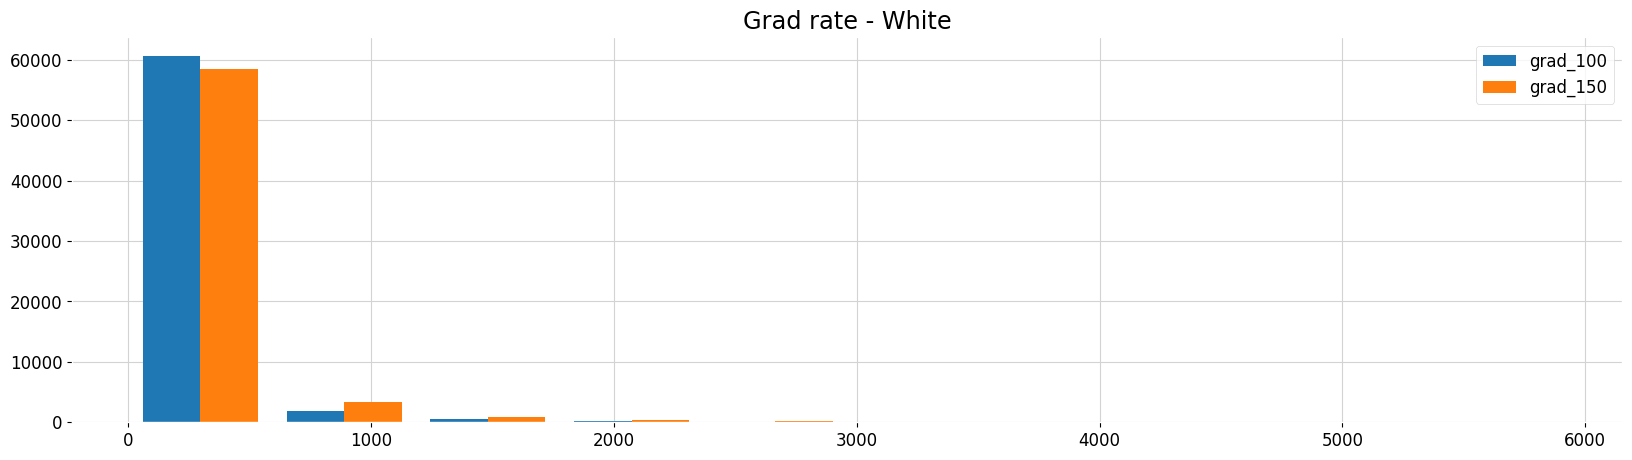

In [426]:
white_grad = white[['grad_100', 'grad_150']].copy()

fig, ax = plt.subplots()
ax.hist(white_grad)
names = ['grad_100', 'grad_150']
plt.title('Grad rate - White')
plt.legend(names)

#### White - Female

In [427]:
white_f = white.loc[white['gender'] == 'F'].copy()
wf_data = white_f[['grad_100', 'grad_150', 'grad_100_rate', 'grad_150_rate']].describe().T
wf_data

,count,mean,std,min,25%,50%,75%,max
grad_100,20886.0,116.086182,204.139935,0.0,9.0,44.0,134.0,2425.0
grad_150,20886.0,165.101360,281.985954,0.0,16.0,66.0,186.0,2856.0
grad_100_rate,20886.0,39.026286,25.180780,0.0,19.8,37.9,56.5,100.0
grad_150_rate,20886.0,53.567394,23.525193,0.0,40.0,55.6,69.2,100.0


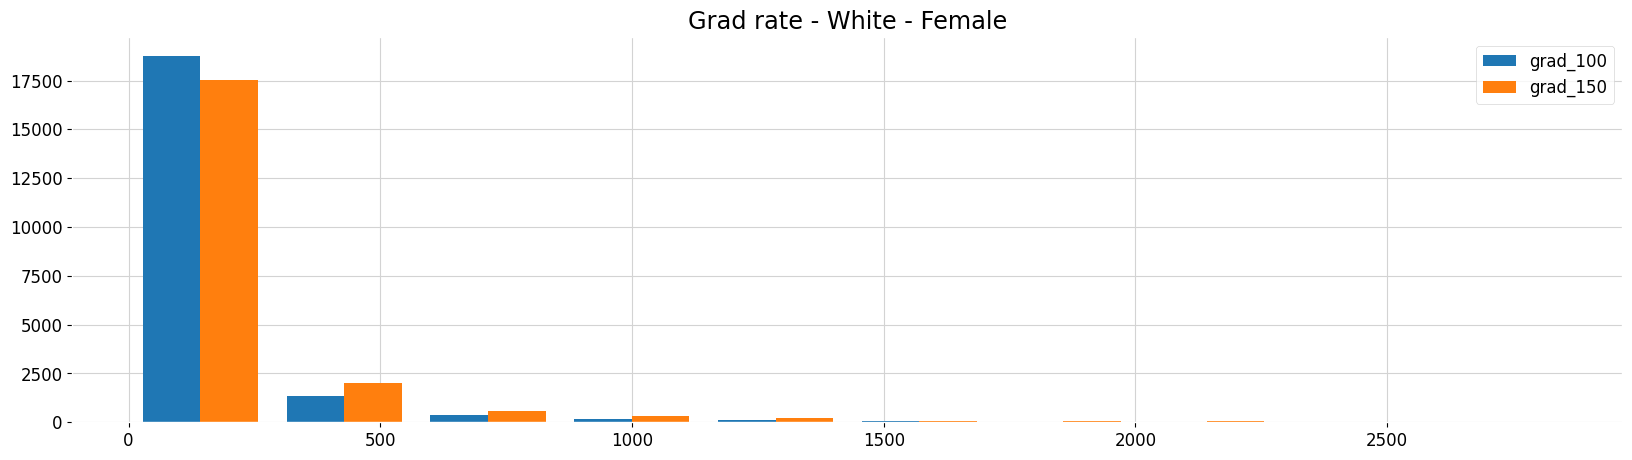

In [428]:
white_grad_f = white_f[['grad_100', 'grad_150']].copy()

fig, ax = plt.subplots()
ax.hist(white_grad_f)
names = ['grad_100', 'grad_150']
plt.title('Grad rate - White - Female')
plt.legend(names)

#### White - Male

In [429]:
white_m = white.loc[white['gender'] == 'M'].copy()
wm_data = white_m[['grad_100', 'grad_150', 'grad_100_rate', 'grad_150_rate']].describe().T
wm_data

,count,mean,std,min,25%,50%,75%,max
grad_100,20730.0,75.688712,142.238855,0.0,5.000,25.0,80.0,2168.0
grad_150,20730.0,128.068548,234.923522,0.0,10.000,47.0,136.0,3066.0
grad_100_rate,20730.0,30.830232,24.330199,0.0,11.600,26.2,46.2,100.0
grad_150_rate,20730.0,47.556315,24.112831,0.0,32.225,48.2,63.8,100.0


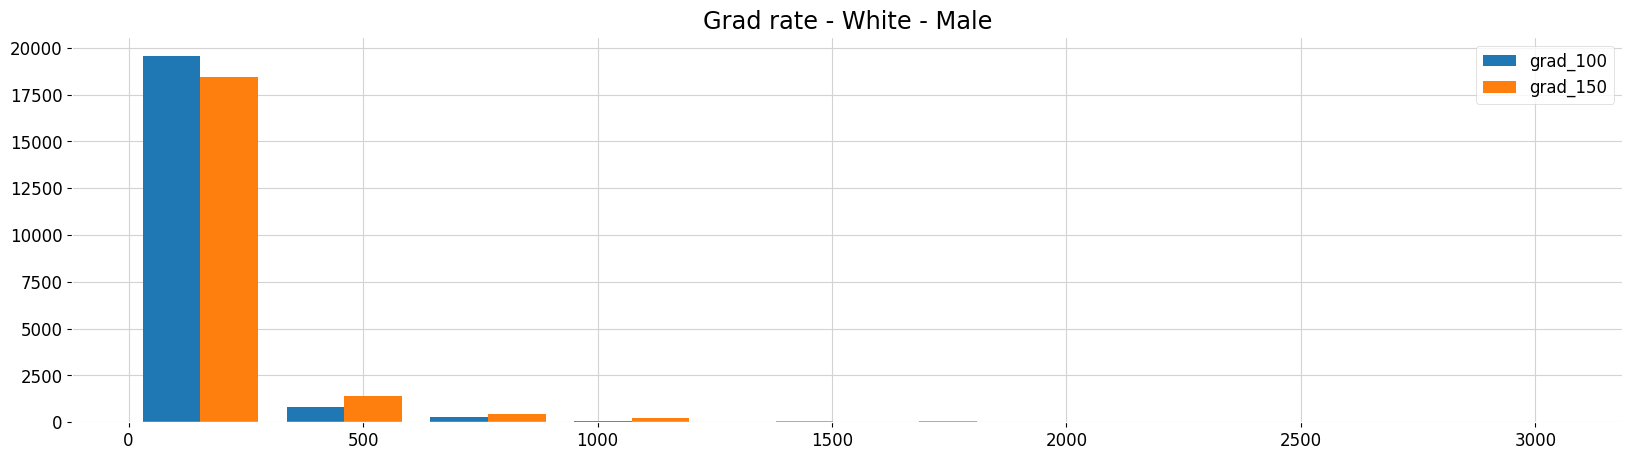

In [430]:
white_grad_m = white_m[['grad_100', 'grad_150']].copy()

fig, ax = plt.subplots()
ax.hist(white_grad_m)
names = ['grad_100', 'grad_150']
plt.title('Grad rate - White - Male')
plt.legend(names)

#### Grade for all white - female/male

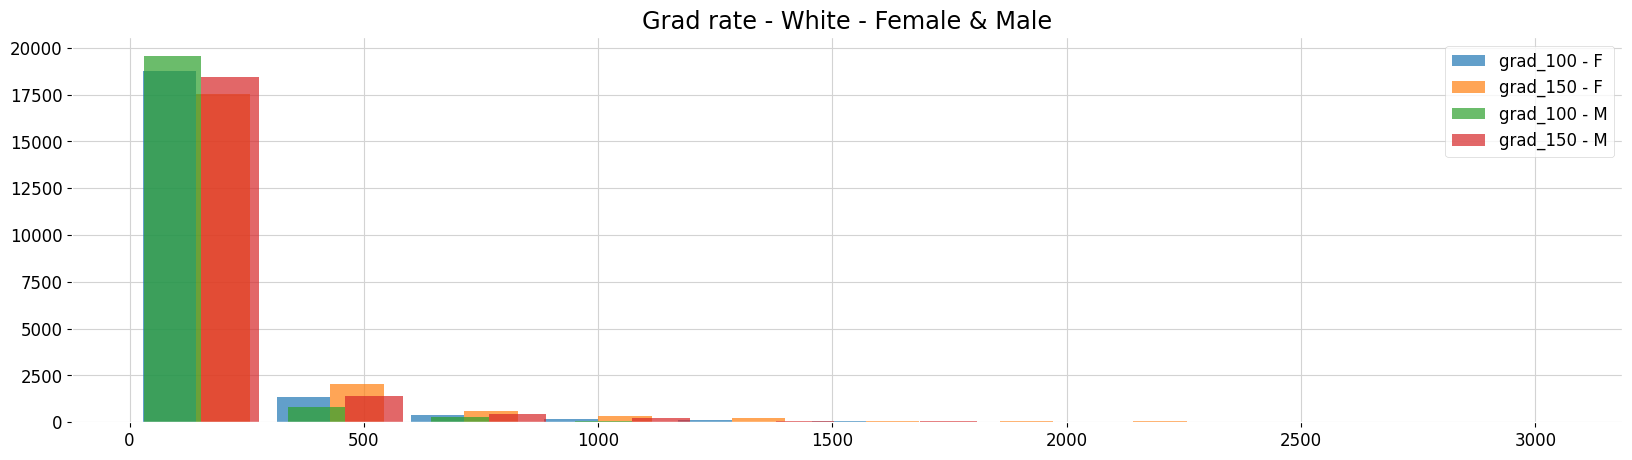

In [431]:
fig, ax = plt.subplots()
ax.hist(white_grad_f, alpha=0.7)
ax.hist(white_grad_m, alpha=0.7)
names = ['grad_100 - F', 'grad_150 - F', 'grad_100 - M', 'grad_150 - M']
plt.title('Grad rate - White - Female & Male')
plt.legend(names)

### All students

In [432]:
all_stud = df_clean.loc[df_clean['race'] == 'W'].copy()
all_stud.head()

,unitid,year,gender,race,grad_100,grad_150,grad_100_rate,grad_150_rate
205095,100654,2011,B,W,1.0,3.0,7.7,23.1
205096,100654,2011,M,W,1.0,1.0,14.3,14.3
205097,100654,2011,F,W,0.0,2.0,0.0,33.3
205113,100654,2012,B,W,1.0,3.0,8.3,25.0
205114,100654,2012,M,W,1.0,2.0,14.3,28.6


In [433]:
des_stud = all_stud[['grad_100', 'grad_150', 'grad_100_rate', 'grad_150_rate']].describe().T
des_stud

,count,mean,std,min,25%,50%,75%,max
grad_100,63352.0,126.076620,246.694907,0.0,8.0,41.0,138.0,4593.0
grad_150,63352.0,192.674833,367.681144,0.0,15.0,68.0,205.0,5922.0
grad_100_rate,63352.0,34.962961,24.793007,0.0,15.4,32.2,51.6,100.0
grad_150_rate,63352.0,50.553659,23.672614,0.0,35.7,51.5,66.7,100.0


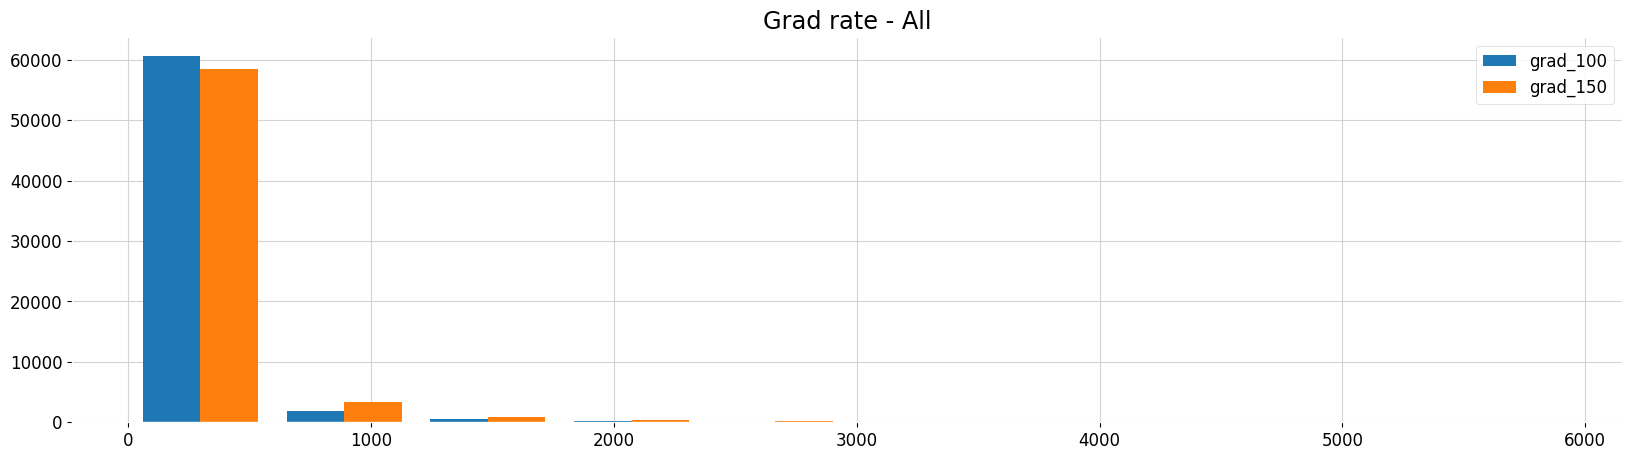

In [434]:
all_grad = all_stud[['grad_100', 'grad_150']].copy()

fig, ax = plt.subplots()
ax.hist(all_grad)
names = ['grad_100', 'grad_150']
plt.title('Grad rate - All')
plt.legend(names)

#### All students - Female

In [435]:
all_f = all_stud.loc[all_stud['gender'] == 'F'].copy()
af_data = all_f[['grad_100', 'grad_150', 'grad_100_rate', 'grad_150_rate']].describe().T
af_data

,count,mean,std,min,25%,50%,75%,max
grad_100,20886.0,116.086182,204.139935,0.0,9.0,44.0,134.0,2425.0
grad_150,20886.0,165.101360,281.985954,0.0,16.0,66.0,186.0,2856.0
grad_100_rate,20886.0,39.026286,25.180780,0.0,19.8,37.9,56.5,100.0
grad_150_rate,20886.0,53.567394,23.525193,0.0,40.0,55.6,69.2,100.0


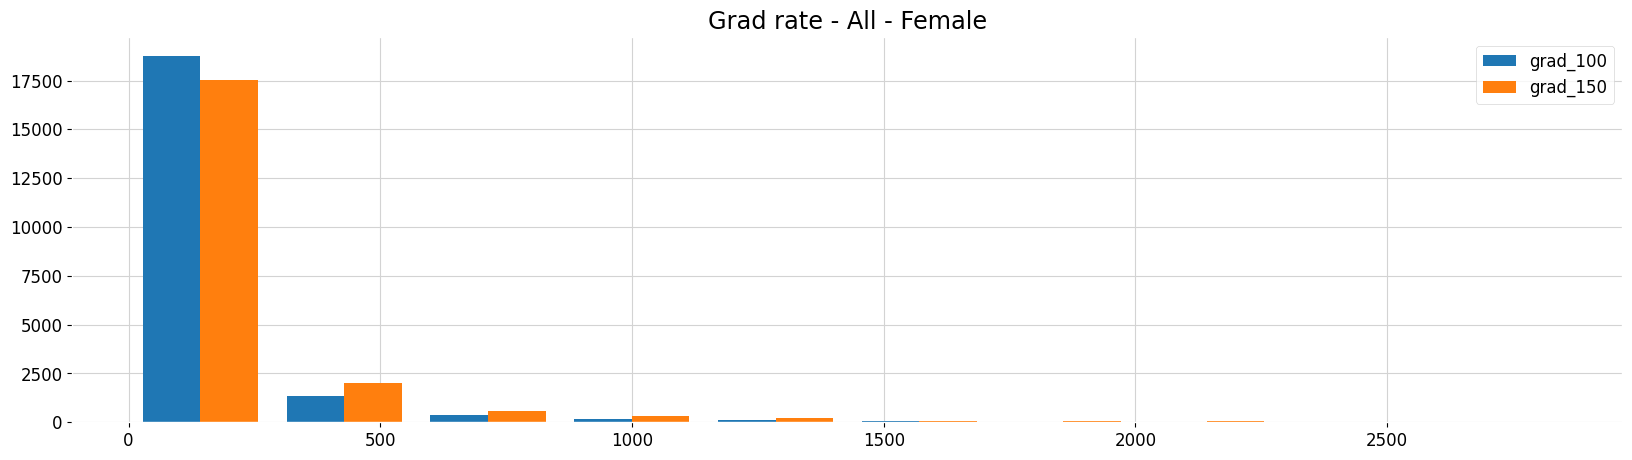

In [436]:
all_grad_f = all_f[['grad_100', 'grad_150']].copy()

fig, ax = plt.subplots()
ax.hist(all_grad_f)
names = ['grad_100', 'grad_150']
plt.title('Grad rate - All - Female')
plt.legend(names)

#### All students - Male

In [437]:
all_m = all_stud.loc[all_stud['gender'] == 'M'].copy()
am_data = all_m[['grad_100', 'grad_150', 'grad_100_rate', 'grad_150_rate']].describe().T
am_data

,count,mean,std,min,25%,50%,75%,max
grad_100,20730.0,75.688712,142.238855,0.0,5.000,25.0,80.0,2168.0
grad_150,20730.0,128.068548,234.923522,0.0,10.000,47.0,136.0,3066.0
grad_100_rate,20730.0,30.830232,24.330199,0.0,11.600,26.2,46.2,100.0
grad_150_rate,20730.0,47.556315,24.112831,0.0,32.225,48.2,63.8,100.0


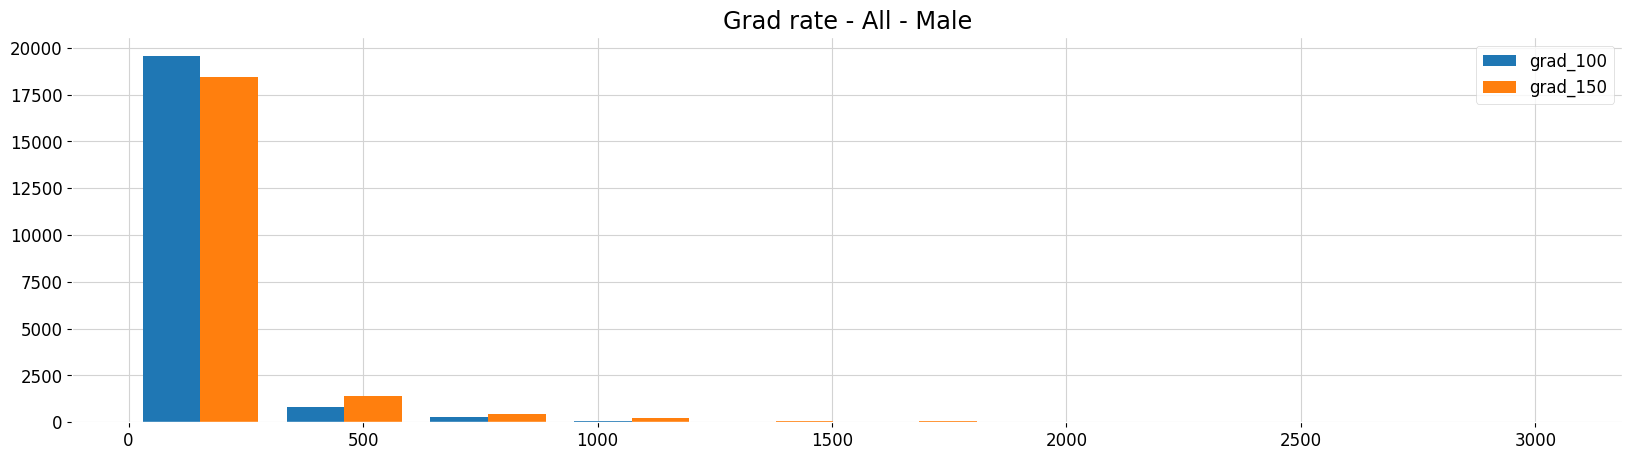

In [438]:
all_grad_m = all_m[['grad_100', 'grad_150']].copy()

fig, ax = plt.subplots()
ax.hist(all_grad_m)
names = ['grad_100', 'grad_150']
plt.title('Grad rate - All - Male')
plt.legend(names)

#### Grad for all students - female/male

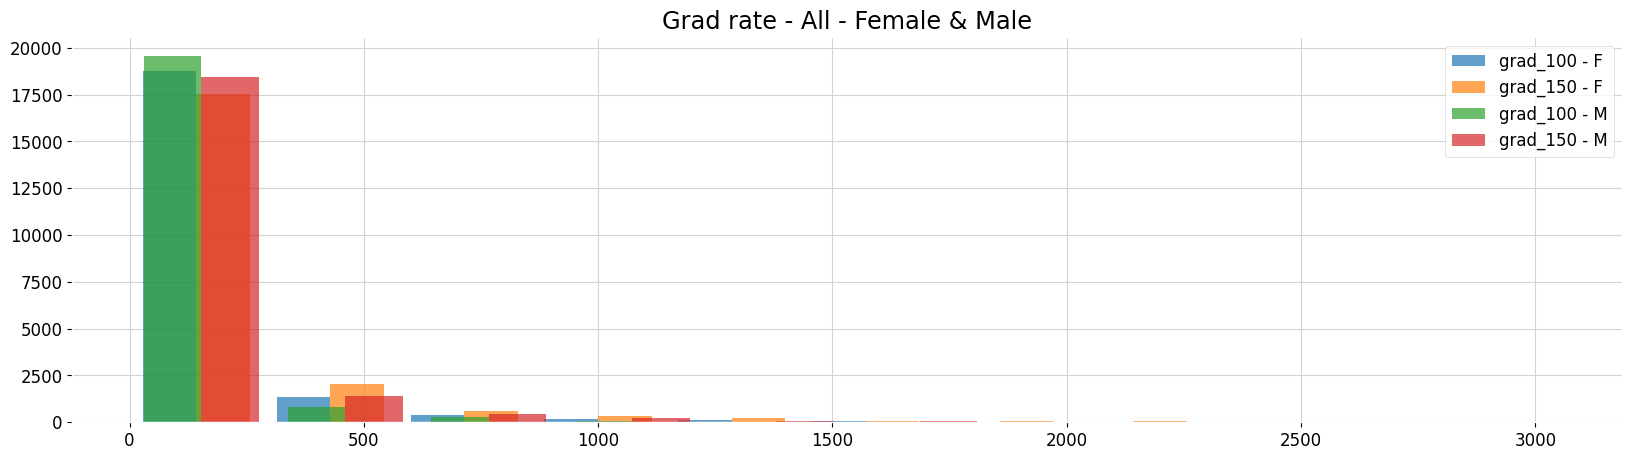

In [439]:
fig, ax = plt.subplots()
ax.hist(all_grad_f, alpha=0.7)
ax.hist(all_grad_m, alpha=0.7)
names = ['grad_100 - F', 'grad_150 - F', 'grad_100 - M', 'grad_150 - M']
plt.title('Grad rate - All - Female & Male')
plt.legend(names)